In [341]:
import sys
import os
import psychopy

In [342]:
import numpy as np
import matplotlib.pyplot as plt

In [340]:
23.8 * 1.05

24.990000000000002

In [343]:

sys.path.append(
    "/Users/wiegerscheurer/repos/physicspred"
)  # To enable importing from repository folders


from functions.physics import _rotate_90, _dir_to_vec, _vec_to_dir, _flip_dir

In [81]:
# !{sys.executable} -m pip install screeninfo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.8 MB/s eta 0:00:00


In [336]:
56 * 34

1904

5250

In [321]:

from functions.utilities import determine_sequence
ball_change_options = [True] * 1 + [False] * 1
ball_hue_moment_options = ["pre", "mid", "post"]

n_trials = 18
ball_changes = determine_sequence(n_trials, ball_change_options, randomised=True)

ball_changes


ball_hue_moments = determine_sequence(np.sum(ball_changes), ball_hue_moment_options, randomised=True)
ball_hue_moments

['post', 'post', 'mid', 'pre', 'pre', 'mid', 'post', 'mid', 'pre']

In [344]:
def balance_over_bool(boolean_list:list, value_options:list, randomised:bool=True) -> list:
    """Map one list of value options onto the True values of a boolean list.

    Args:
        boolean_list (list): List that indicates which trials should get a value.
        value_options (list): List of the value options
    """    
    
    val_seq = determine_sequence(np.sum(boolean_list), value_options, randomised=randomised)
    
    result = []
    value_index = 0
    for item in boolean_list:
        if item:
            result.append(val_seq[value_index])
            value_index += 1
        else:
            result.append(False)
    return result

# Example usage
# boolean_list = [True, False, True, True, False, True]
# values_list = ["pre", "mid", "post", "extra"]

mapped_list = balance_over_bool(ball_changes, ball_hue_moment_options)
print(mapped_list)  # Output: ['pre', False, 'mid', 'post', False, 'extra']

[False, 'post', False, False, 'pre', 'pre', 'mid', False, False, 'post', 'post', False, False, 'pre', 'mid', False, False, 'mid']


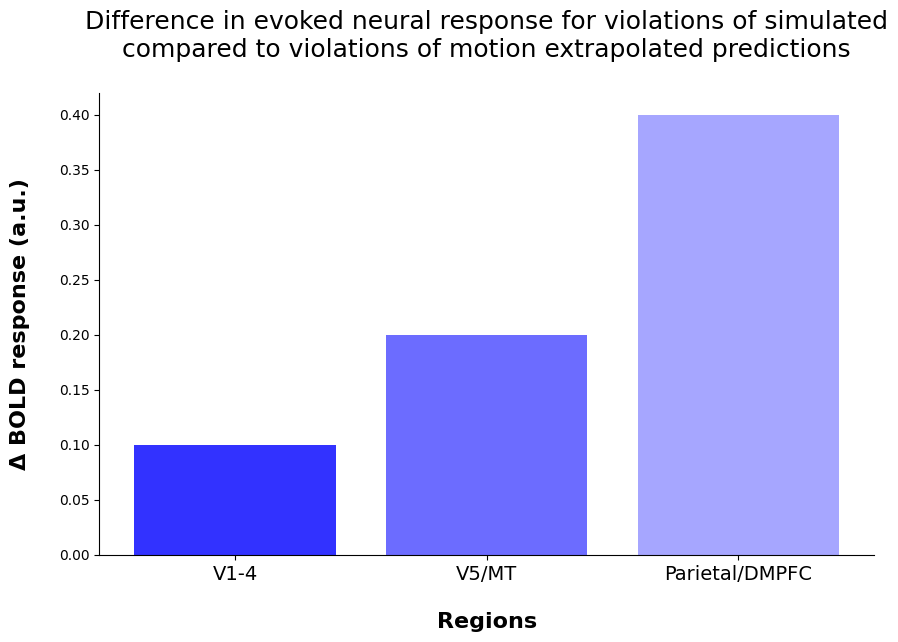

In [254]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
regions = ["V1-4", "V5/MT", "Parietal/DMPFC"]
values = [0.1, 0.2, 0.4]  # Simulated data, decreasing along the x axis

# Create a color map
cmap = plt.get_cmap('bwr')
colors = cmap(np.linspace(0.1, 1, len(values)*3))

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(regions, values, color=colors)

# Customize the plot
plt.ylabel('Δ BOLD response (a.u.)\n', fontweight='bold', fontsize=16)
plt.xlabel('\nRegions', fontweight='bold', fontsize=16)
plt.title('Difference in evoked neural response for violations of simulated\ncompared to violations of motion extrapolated predictions\n', fontsize=18, fontweight="light")

# Customize the x-ticks
plt.xticks(fontsize=14)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.show()

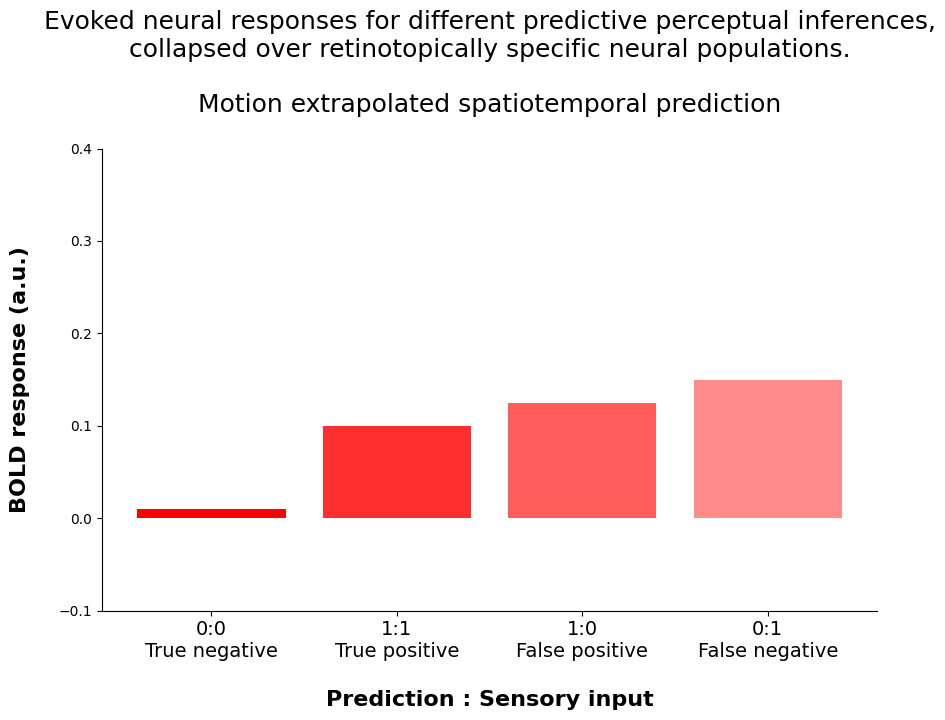

In [296]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
regions = ["0:0\nTrue negative", "1:1\nTrue positive", "1:0\nFalse positive", "0:1\nFalse negative"]
values = [0.01, 0.1, 0.125, 0.15]  # Simulated data, decreasing along the x axis

# Create a color map
cmap = plt.get_cmap('bwr_r')
colors = cmap(np.linspace(0., 1, len(values) * 3))

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(regions, values, color=colors)

# Customize the plot
plt.ylabel('BOLD response (a.u.)\n', fontweight='bold', fontsize=16)
plt.xlabel('\nPrediction : Sensory input', fontweight='bold', fontsize=16)
plt.title('Evoked neural responses for different predictive perceptual inferences,\ncollapsed over retinotopically specific neural populations.\n\nMotion extrapolated spatiotemporal prediction\n', fontsize=18, fontweight="light")

# Customize the x-ticks
plt.xticks(fontsize=14)

# Set y-axis limits
plt.ylim(-0.1, max(values))
plt.ylim(-0.1, .4)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.show()

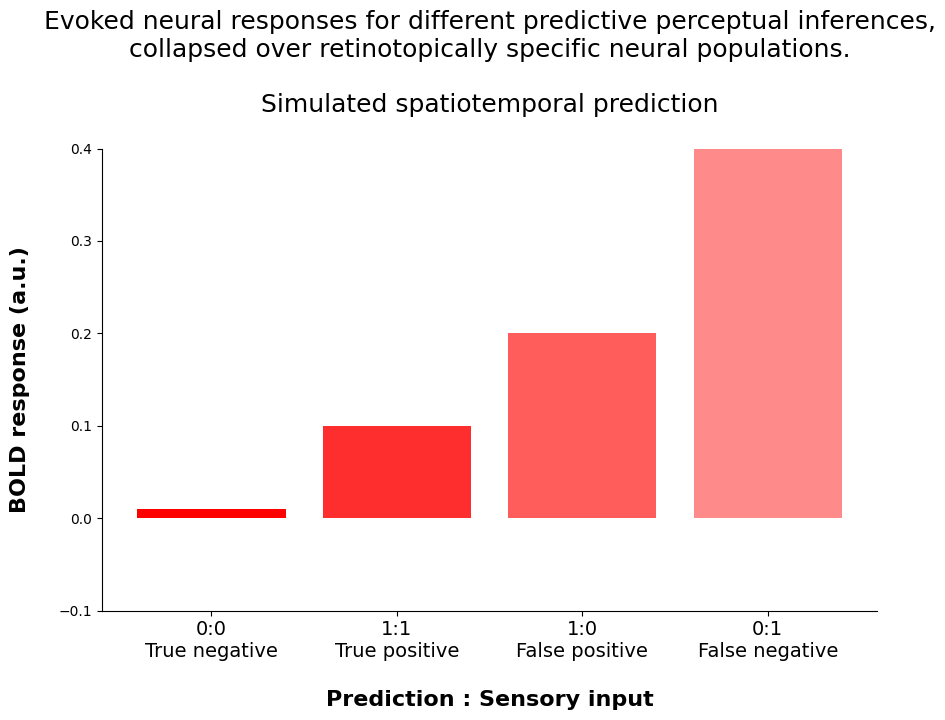

In [295]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
regions = ["0:0\nTrue negative", "1:1\nTrue positive", "1:0\nFalse positive", "0:1\nFalse negative"]
values = [0.01, 0.1, 0.2, 0.4]  # Simulated data, decreasing along the x axis

# Create a color map
cmap = plt.get_cmap('bwr_r')
colors = cmap(np.linspace(0., 1, len(values) * 3))

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(regions, values, color=colors)

# Customize the plot
plt.ylabel('BOLD response (a.u.)\n', fontweight='bold', fontsize=16)
plt.xlabel('\nPrediction : Sensory input', fontweight='bold', fontsize=16)
plt.title('Evoked neural responses for different predictive perceptual inferences,\ncollapsed over retinotopically specific neural populations.\n\nSimulated spatiotemporal prediction\n', fontsize=18, fontweight="light")

# Customize the x-ticks
plt.xticks(fontsize=14)

# Set y-axis limits
plt.ylim(-0.1, max(values))

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.show()

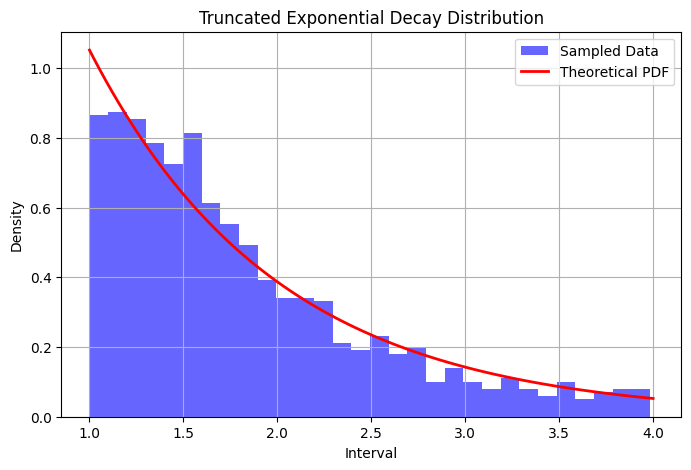

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncexpon

def truncated_exponential_decay(min_iti, truncation_cutoff, size=1000):
    """
    Generate a truncated exponential decay distribution.

    Parameters:
        min_iti (float): The minimum ITI (lower bound of the distribution).
        truncation_cutoff (float): The upper bound of the distribution.
        size (int): Number of samples to generate.

    Returns:
        samples (numpy.ndarray): Random samples from the truncated exponential distribution.
    """
    # Define the scale parameter for the exponential decay
    scale = 1.0  # Adjust this to control the steepness of decay
    b = (truncation_cutoff - min_iti) / scale  # Shape parameter for truncation

    # Generate random samples
    samples = truncexpon(b=b, loc=min_iti, scale=scale).rvs(size=size)
    return samples

def plot_distribution(samples, min_iti, truncation_cutoff):
    """
    Plot the histogram of the truncated exponential distribution.

    Parameters:
        samples (numpy.ndarray): Random samples from the truncated exponential distribution.
        min_iti (float): The minimum ITI.
        truncation_cutoff (float): The upper bound of the distribution.
    """
    plt.figure(figsize=(8, 5))
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='blue', label="Sampled Data")

    # Plot theoretical PDF for comparison
    scale = 1.0
    b = (truncation_cutoff - min_iti) / scale
    x = np.linspace(min_iti, truncation_cutoff, 100)
    pdf = truncexpon(b=b, loc=min_iti, scale=scale).pdf(x)
    plt.plot(x, pdf, 'r-', lw=2, label="Theoretical PDF")

    plt.title("Truncated Exponential Decay Distribution")
    plt.xlabel("Interval")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
min_iti = 1.0  # Minimum ITI
truncation_cutoff = 4.0  # Maximum ITI
samples = truncated_exponential_decay(min_iti=min_iti, truncation_cutoff=truncation_cutoff, size=1000)

# Plot the distribution
plot_distribution(samples, min_iti=min_iti, truncation_cutoff=truncation_cutoff)


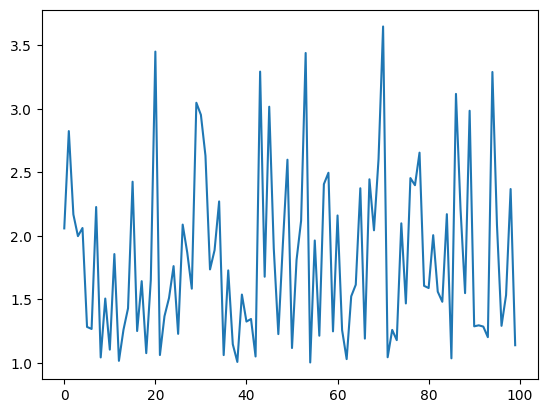

In [26]:
itis = truncated_exponential_decay(1, 4, 100)

plt.plot(itis)
# print(itis)
# np.random.shuffle(itis)
# print(itis)

# plt.plot(itis)

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def two_sided_truncated_exponential(center, min_jitter, max_jitter, scale=1.0, size=1000):
    """
    Generate a two-sided truncated exponential decay distribution that peaks at the center.

    Parameters:
        center (float): The central point of the distribution (e.g., critical event time).
        min_jitter (float): The minimum jitter value (left bound).
        max_jitter (float): The maximum jitter value (right bound).
        scale (float): The scale parameter controlling steepness of the decay.
        size (int): Number of samples to generate.

    Returns:
        samples (numpy.ndarray): Random samples from the two-sided truncated exponential distribution.
    """
    # Create an array of possible jitter values
    x = np.linspace(min_jitter, max_jitter, 1000)
    
    # Define left and right exponential decays
    left_decay = np.exp(-(center - x[x <= center]) / scale)
    right_decay = np.exp(-(x[x > center] - center) / scale)
    
    # Combine left and right sides
    pdf = np.concatenate([left_decay, right_decay])
    
    # Normalize PDF so it integrates to 1
    pdf /= np.sum(pdf)
    
    # Sample from this custom PDF using inverse transform sampling
    cdf = np.cumsum(pdf)  # Compute cumulative density function
    cdf /= cdf[-1]  # Ensure CDF ends at 1
    random_values = np.random.rand(size)  # Uniform random values between 0 and 1
    samples = np.interp(random_values, cdf, x)  # Map random values to jitter times
    
    return samples

# Example usage
center_time = 0       # Critical moment in trial
min_jitter = -1       # Minimum jitter (-2 seconds before center)
max_jitter = 1       # Maximum jitter (+2 seconds after center)
scale = 0.5           # Steepness of decay

# Generate samples
samples = two_sided_truncated_exponential(center_time, min_jitter, max_jitter, scale=scale)

def plot_two_sided_distribution(samples, center_time, min_jitter, max_jitter, scale=1.0):
    # Plot histogram of sampled data
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='blue', label="Sampled Data")

    # Plot theoretical PDF for visualization
    x = np.linspace(min_jitter, max_jitter, 1000)
    left_decay = np.exp(-(center_time - x[x <= center_time]) / scale)
    right_decay = np.exp(-(x[x > center_time] - center_time) / scale)
    pdf = np.concatenate([left_decay, right_decay])
    pdf /= np.sum(pdf) * (x[1] - x[0])  # Normalize for plotting purposes
    plt.plot(x, pdf, 'r-', lw=2, label="Theoretical PDF")

    plt.title("Two-Sided Truncated Exponential Decay")
    plt.xlabel("Time relative to center (s)")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()


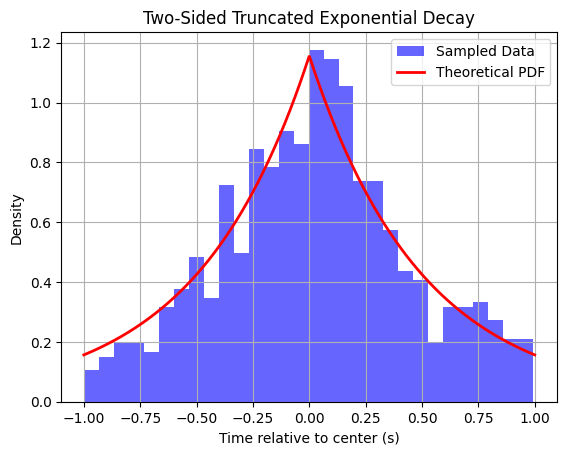

In [54]:
plot_two_sided_distribution(samples, center_time, min_jitter, max_jitter, scale=scale)

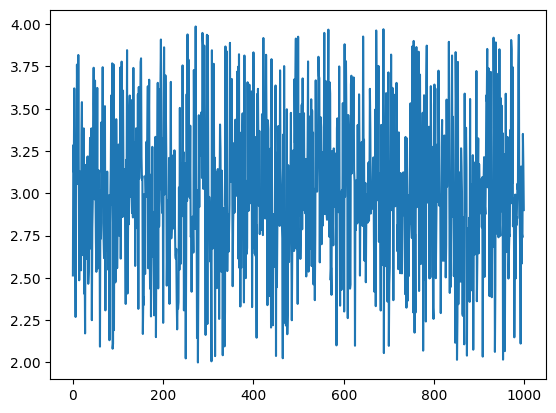

In [52]:
plt.plot(samples + 3)

In [7]:
occluder_radius = 130
ball_radius = 40


ecc_from_center = occluder_radius - (ball_radius * 1.5)
print(ecc_from_center)


print(np.cos(np.deg2rad(45)) * ball_radius)

dist = (np.sin(np.deg2rad(45)) * ball_radius)
2 * dist

70.0
28.284271247461902


56.5685424949238

ModuleNotFoundError: No module named 'functions'

## Important for the phantom bounce value

In [104]:
# Compute distance of ball to fixation for phantom bounce
# THis is once again a 45 45 90 triangle, of which the 2 sides are ball_radius
ball_radius = 40
distance_to_fixation = ball_radius / np.sin(np.deg2rad(45)) 
distance_to_fixation

56.568542494923804

In [102]:
d_bounce = .2
d_continue = .35



0.4

In [99]:
# Okay so every 1/60th of a second, the ball moves 6 pixels
# The screen is 1440, in the current implementation, so I can make a computation of its speed
square_size = 1440
# ball_spawn_spread = 1.8
# spawn_loc = square_size // ball_spawn_spread
# print(spawn_loc)

dist_prior_screen_enter = (square_size // 2) 

pix_dist = square_size + (ball_radius * 2)
dist_per_frame = 6
frames_to_cross = (pix_dist/dist_per_frame)

time_to_cross = frames_to_cross / 60
print(time_to_cross)

4.222222222222222


In [86]:
def get_dist_dif(ball_radius):
    """
    Calculate the difference in distance between a bouncing ball
    and a continuous ball, based on the horizontal side of the
    triangle formed by the ball when hitting a 45-degree angle.
    
    Parameters:
        ball_radius (float): The radius of the ball.
    
    Returns:
        float: The the less distance traveled by the bouncing ball.
    """
    return np.cos(np.deg2rad(45)) * ball_radius

def compute_skip_factor(current_speed:float, slower_or_faster:str, temporal_dif:float, distance:float):
    
    


get_dist_dif(40)

28.284271247461902

In [81]:
# np.sin(np.pi/4) * ball_radius

np.deg2rad(45) == np.pi/4

True

In [78]:
import numpy as np

# Given hypotenuse length
hypotenuse = ball_radius

# Calculate the length of the other sides
side_length = hypotenuse * np.sqrt(2) / 2

print(f"Length of each side: {side_length}")

Length of each side: 28.284271247461902


### Intermittent performance stats feedback work

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random 
sys.path.append(
    "/Users/wiegerscheurer/repos/physicspred"
)  # To enable importing from repository folders

from functions.analysis import get_precision, get_data, get_sensitivity, get_f1_score, get_rt, get_accuracy


# soepdf = get_data(subject="sub-zwoep")
# # get_precision(soepdf)
# get_sensitivity(soepdf)
# # soepdf

In [2]:
# melv1 = get_data(subject="sub-melvin", task = "ball_hue")
# melv2 = get_data(subject="sub-melvin2", task = "ball_hue")

# # melvin = pd.hs([melv1, melv2])
# # stack the dataframes on top of one another
# melvin = pd.concat([melv1, melv2], axis=0)

# # reset the index
# melvin = melvin.reset_index(drop=True)

# # melvin
# melvin

In [3]:
# melvin.to_csv("melvin.csv")
# melvin.to_csv("/Users/wiegerscheurer/repos/physicspred/data/sub-melvin/ball_hue/pilot.csv")

In [4]:
melvin = get_data(subject="sub-melvin", task = "ball_hue")


prec = get_precision(melvin, hypothesis = "both", include_dubtrials=False, return_df=False)
sens = get_sensitivity(melvin, hypothesis = "both", include_dubtrials=False, return_df=False)
f1 = get_f1_score(melvin, hypothesis = "both", include_dubtrials=False, return_df=False)

print(f"Precision: {prec}")
print(f"Sensitivity: {sens}")
print(f"F1 score: {f1}")

melvin

Precision: {'simulation': 0.7575757575757576, 'abstraction': 0.7777777777777778}
Sensitivity: {'simulation': 0.8620689655172413, 'abstraction': 0.84}
F1 score: {'simulation': 0.8064516129032258, 'abstraction': 0.8076923076923077}


,Unnamed: 0,trial,ball_speed,interactor,bounce,bounce_moment,random_bounce_direction,target_onset,speed_change,ball_change,...,start_pos,end_pos,abs_rfup,abs_rfright,abs_rfdown,abs_rfleft,sim_rfup,sim_rfright,sim_rfdown,sim_rfleft
0,0,1,7.5,45_top_r,False,NaN,NaN,4.075463,slower,True,...,left,right,"(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)","(0, 0)"
1,1,2,7.5,45_top_r,True,3.870897,NaN,3.992594,slower,True,...,left,down,"(0, 0)","(1, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)"
2,2,3,8.5,45_top_u,True,3.856596,NaN,NaN,NaN,False,...,down,left,"(1, 0)","(0, 0)","(0, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)"
3,3,4,8.5,none_u,True,NaN,left,NaN,NaN,False,...,down,left,"(1, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)","(0, 0)","(0, 0)","(0, 1)"
4,4,5,8.0,45_top_r,False,NaN,NaN,4.021890,faster,True,...,left,right,"(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)","(0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,96,7.5,45_bottom_l,True,3.881808,NaN,NaN,NaN,False,...,right,up,"(0, 1)","(0, 0)","(0, 0)","(1, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)"
146,146,97,8.0,45_top_r,True,3.867159,NaN,3.985989,slower,True,...,left,down,"(0, 0)","(1, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)"
147,147,98,8.0,none_l,False,NaN,NaN,3.990292,faster,True,...,right,left,"(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)"
148,148,99,8.0,none_l,True,NaN,right,NaN,NaN,False,...,right,up,"(0, 1)","(0, 0)","(0, 0)","(1, 0)","(0, 1)","(0, 0)","(0, 0)","(1, 0)"


In [5]:
paulo = get_data(subject="sub-paulo", task = "ball_hue")


prec = get_precision(paulo, hypothesis = "both", include_dubtrials=False, return_df=False)
sens = get_sensitivity(paulo, hypothesis = "both", include_dubtrials=False, return_df=False)
f1 = get_f1_score(paulo, hypothesis = "both", include_dubtrials=False, return_df=False)

print(f"Precision: {prec}")
print(f"Sensitivity: {sens}")
print(f"F1 score: {f1}")


Precision: {'simulation': 0.65625, 'abstraction': 0.75}
Sensitivity: {'simulation': 0.84, 'abstraction': 0.8571428571428571}
F1 score: {'simulation': 0.736842105263158, 'abstraction': 0.7999999999999999}


In [6]:
yifan = get_data(subject="sub-yifan", task = "ball_hue")


prec = get_precision(yifan, hypothesis = "both", include_dubtrials=False, return_df=False)
sens = get_sensitivity(yifan, hypothesis = "both", include_dubtrials=False, return_df=False)
f1 = get_f1_score(yifan, hypothesis = "both", include_dubtrials=False, return_df=False)

print(f"Precision: {prec}")
print(f"Sensitivity: {sens}")
print(f"F1 score: {f1}")


Precision: {'simulation': 0.8461538461538461, 'abstraction': 0.7931034482758621}
Sensitivity: {'simulation': 0.9166666666666666, 'abstraction': 0.9583333333333334}
F1 score: {'simulation': 0.8799999999999999, 'abstraction': 0.8679245283018867}


In [7]:
ann = get_data(subject="sub-ann", task = "ball_hue")


prec = get_precision(ann, hypothesis = "both", include_dubtrials=False, return_df=False)
sens = get_sensitivity(ann, hypothesis = "both", include_dubtrials=False, return_df=False)
f1 = get_f1_score(ann, hypothesis = "both", include_dubtrials=False, return_df=False)

print(f"Precision: {prec}")
print(f"Sensitivity: {sens}")
print(f"F1 score: {f1}")


Precision: {'simulation': 0.8571428571428571, 'abstraction': 0.696969696969697}
Sensitivity: {'simulation': 0.8571428571428571, 'abstraction': 0.7419354838709677}
F1 score: {'simulation': 0.8571428571428571, 'abstraction': 0.71875}


In [8]:
qifei = get_data(subject="sub-qifei", task = "ball_hue")


prec = get_precision(qifei, hypothesis = "both", include_dubtrials=False, return_df=False)
sens = get_sensitivity(qifei, hypothesis = "both", include_dubtrials=False, return_df=False)
f1 = get_f1_score(qifei, hypothesis = "both", include_dubtrials=False, return_df=False)

print(f"Precision: {prec}")
print(f"Sensitivity: {sens}")
print(f"F1 score: {f1}")


Precision: {'simulation': 0.7407407407407407, 'abstraction': 0.8125}
Sensitivity: {'simulation': 0.9523809523809523, 'abstraction': 0.9285714285714286}
F1 score: {'simulation': 0.8333333333333334, 'abstraction': 0.8666666666666666}


In [9]:
mingyao = get_data(subject="sub-mingyao", task = "ball_hue")


prec = get_precision(mingyao, hypothesis = "both", include_dubtrials=False, return_df=False)
sens = get_sensitivity(mingyao, hypothesis = "both", include_dubtrials=False, return_df=False)
f1 = get_f1_score(mingyao, hypothesis = "both", include_dubtrials=False, return_df=False)

print(f"Precision: {prec}")
print(f"Sensitivity: {sens}")
print(f"F1 score: {f1}")


Precision: {'simulation': 0.9166666666666666, 'abstraction': 0.8928571428571429}
Sensitivity: {'simulation': 0.9166666666666666, 'abstraction': 0.8928571428571429}
F1 score: {'simulation': 0.9166666666666666, 'abstraction': 0.8928571428571429}


In [10]:
bilge = get_data(subject="sub-bilge", task = "ball_hue")


prec = get_precision(bilge, hypothesis = "both", include_dubtrials=False, return_df=False)
sens = get_sensitivity(bilge, hypothesis = "both", include_dubtrials=False, return_df=False)
f1 = get_f1_score(bilge, hypothesis = "both", include_dubtrials=False, return_df=False)

print(f"Precision: {prec}")
print(f"Sensitivity: {sens}")
print(f"F1 score: {f1}")


Precision: {'simulation': 0.9565217391304348, 'abstraction': 0.9642857142857143}
Sensitivity: {'simulation': 0.9565217391304348, 'abstraction': 0.9642857142857143}
F1 score: {'simulation': 0.9565217391304348, 'abstraction': 0.9642857142857143}


In [11]:
yanni = get_data(subject="sub-yanni", task = "ball_hue")


prec = get_precision(yanni, hypothesis = "both", include_dubtrials=False, return_df=False)
sens = get_sensitivity(yanni, hypothesis = "both", include_dubtrials=False, return_df=False)
f1 = get_f1_score(yanni, hypothesis = "both", include_dubtrials=False, return_df=False)

print(f"Precision: {prec}")
print(f"Sensitivity: {sens}")
print(f"F1 score: {f1}")


rt = get_rt(yanni, hypothesis = "both", include_dubtrials=False, return_df=False, only_correct=False)
rt_dubs = get_rt(yanni, hypothesis = "both", include_dubtrials="only", return_df=False, only_correct=False)


rt_cor = get_rt(yanni, hypothesis = "both", include_dubtrials=False, return_df=False, only_correct=True)
rt_dubs_cor = get_rt(yanni, hypothesis = "both", include_dubtrials="only", return_df=False, only_correct=True)
print(rt, rt_dubs)
print(rt_cor, rt_dubs_cor)

Precision: {'simulation': 0.525, 'abstraction': 0.6875}
Sensitivity: {'simulation': 0.84, 'abstraction': 0.9565217391304348}
F1 score: {'simulation': 0.6461538461538462, 'abstraction': 0.8}
{'simulation': 0.6894911984203472, 'abstraction': 0.7768194867583754} {'sim + abs': 0.7233898541502034}
{'simulation': 0.6894911984203472, 'abstraction': 0.7768194867583754} {'sim + abs': 0.7233898541502034}


In [12]:
yanni

,trial,ball_speed,interactor,bounce,bounce_moment,random_bounce_direction,target_onset,speed_change,ball_change,abs_congruent,...,start_pos,end_pos,abs_rfup,abs_rfright,abs_rfdown,abs_rfleft,sim_rfup,sim_rfright,sim_rfdown,sim_rfleft
0,1,8.0,none_d,False,NaN,NaN,3.833304,faster,True,True,...,up,down,"(0, 0)","(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)"
1,2,8.5,45_bottom_d,False,NaN,NaN,NaN,NaN,False,True,...,up,down,"(0, 0)","(0, 0)","(1, 1)","(0, 0)","(0, 0)","(1, 0)","(0, 1)","(0, 0)"
2,3,7.5,135_bottom_d,False,NaN,NaN,NaN,NaN,False,True,...,up,down,"(0, 0)","(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)"
3,4,8.0,none_l,False,NaN,NaN,NaN,NaN,False,True,...,right,left,"(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)"
4,5,8.0,45_top_u,True,3.641187,NaN,NaN,NaN,False,False,...,down,left,"(1, 0)","(0, 0)","(0, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,7.5,none_l,False,NaN,NaN,3.738320,slower,True,True,...,right,left,"(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)"
146,147,8.0,135_bottom_d,True,3.631562,NaN,3.740338,faster,True,False,...,up,left,"(0, 0)","(0, 0)","(1, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)"
147,148,7.5,135_top_u,False,NaN,NaN,NaN,NaN,False,True,...,down,up,"(1, 1)","(0, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)","(0, 0)","(0, 0)"
148,149,8.0,135_bottom_d,True,3.622973,NaN,3.728671,faster,True,False,...,up,left,"(0, 0)","(0, 0)","(1, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)"


In [78]:
yanni["response"].value_counts()

# count how many times it's not nan
yanni["response"].count()



100

In [246]:
qifei

# compute average of all subjects
all_sub_dfs = [melvin, paulo, yifan, ann, qifei, mingyao, bilge, yanni]
all_sub_names = ["melvin", "paulo", "yifan", "ann", "qifei", "mingyao", "bilge", "yanni"]
all_subs = pd.concat(all_sub_dfs, axis=0)
all_subs = all_subs.reset_index(drop=True)

prec = get_precision(all_subs, hypothesis = "both", include_dubtrials=False, return_df=False)
sens = get_sensitivity(all_subs, hypothesis = "both", include_dubtrials=False, return_df=False)
f1 = get_f1_score(all_subs, hypothesis = "both", include_dubtrials=False, return_df=False)

print(f"Precision: {prec}")
print(f"Sensitivity: {sens}")
print(f"F1 score: {f1}")

Precision: {'simulation': 0.7566371681415929, 'abstraction': 0.7925311203319502}
Sensitivity: {'simulation': 0.890625, 'abstraction': 0.8883720930232558}
F1 score: {'simulation': 0.8181818181818182, 'abstraction': 0.837719298245614}


In [15]:
prec = get_precision(all_subs, hypothesis = "both", include_dubtrials="only", return_df=False)
sens = get_sensitivity(all_subs, hypothesis = "both", include_dubtrials="only", return_df=False)
f1 = get_f1_score(all_subs, hypothesis = "both", include_dubtrials="only", return_df=False)

print(prec, sens, f1)


{'sim + abs': 0.8725490196078431} {'sim + abs': 0.8725490196078431} {'sim + abs': 0.8725490196078431}


## Different computation, now do it based on accuracy in simcongruent vs simincongruent, as well as for abs

In [291]:
this_df = bilge
# Turn all accuracy rows that are empty into True
this_df["accuracy"] = this_df["accuracy"].fillna(True)

# hypothesis = "simulation"

# hypotheses_types = ["simulation", "abstraction"]
# hypotheses = hypotheses_types if hypothesis == "both" else [hypothesis]

# stat_dict = {}

# other_hypothesis = [h for h in hypotheses_types if h != hypothesis][0]


sim_con_acc = this_df[(this_df["sim_congruent"] == True) & (this_df["abs_congruent"] != True)]
sim_con_acc = sim_con_acc["accuracy"].mean()
print(sim_con_acc)


sim_incon_acc = this_df[(this_df["sim_congruent"] == False) & (this_df["abs_congruent"] != False)]
sim_incon_acc = sim_incon_acc["accuracy"].mean()
print(sim_incon_acc)

0.9803921568627451
0.9803921568627451


In [292]:
this_df = bilge
# Turn all accuracy rows that are empty into True
this_df["accuracy"] = this_df["accuracy"].fillna(True)


abs_con_acc = this_df[(this_df["abs_congruent"] == True) & (this_df["sim_congruent"] != True)]
abs_con_acc = abs_con_acc["accuracy"].mean()
print(abs_con_acc)


abs_incon_acc = this_df[(this_df["abs_congruent"] == False) & (this_df["sim_congruent"] != False)]
abs_incon_acc = abs_incon_acc["accuracy"].mean()
print(abs_incon_acc)

0.9803921568627451
0.9803921568627451


In [16]:
rt = get_rt(all_subs, hypothesis = "both", include_dubtrials=False, return_df=False, only_correct=False)
rt_dubs = get_rt(all_subs, hypothesis = "both", include_dubtrials="only", return_df=False, only_correct=False)


rt_cor = get_rt(all_subs, hypothesis = "both", include_dubtrials=False, return_df=False, only_correct=True)
rt_dubs_cor = get_rt(all_subs, hypothesis = "both", include_dubtrials="only", return_df=False, only_correct=True)
print(rt, rt_dubs)
print(rt_cor, rt_dubs_cor)

{'simulation': 0.8623183798671248, 'abstraction': 0.9090200850775242} {'sim + abs': 0.8460868001036513}
{'simulation': 0.8623183798671248, 'abstraction': 0.9090283357407849} {'sim + abs': 0.8460868001036513}


In [82]:
def count_different_responses(df):
    """
    Counts the number of rows where the 'response' column has a non-empty, non-NaN value
    that is different from the value in the 'end_pos' column.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.

    Returns:
    int: The count of rows with different 'response' and 'end_pos' values.
    """
    # Filter rows where 'response' is not NaN and not empty
    valid_responses = df['response'].dropna()
    valid_responses = valid_responses[valid_responses != '']

    # Count rows where 'response' is different from 'end_pos'
    count = (valid_responses != df.loc[valid_responses.index, 'end_pos']).sum()

    return count

count_different_responses(all_subs)

5

In [83]:
all_subs

,Unnamed: 0,trial,ball_speed,interactor,bounce,bounce_moment,random_bounce_direction,target_onset,speed_change,ball_change,...,start_pos,end_pos,abs_rfup,abs_rfright,abs_rfdown,abs_rfleft,sim_rfup,sim_rfright,sim_rfdown,sim_rfleft
0,0.0,1,7.5,45_top_r,False,NaN,NaN,4.075463,slower,True,...,left,right,"(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)","(0, 0)"
1,1.0,2,7.5,45_top_r,True,3.870897,NaN,3.992594,slower,True,...,left,down,"(0, 0)","(1, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)"
2,2.0,3,8.5,45_top_u,True,3.856596,NaN,NaN,NaN,False,...,down,left,"(1, 0)","(0, 0)","(0, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)"
3,3.0,4,8.5,none_u,True,NaN,left,NaN,NaN,False,...,down,left,"(1, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)","(0, 0)","(0, 0)","(0, 1)"
4,4.0,5,8.0,45_top_r,False,NaN,NaN,4.021890,faster,True,...,left,right,"(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)","(0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,NaN,146,7.5,none_l,False,NaN,NaN,3.738320,slower,True,...,right,left,"(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)"
1196,NaN,147,8.0,135_bottom_d,True,3.631562,NaN,3.740338,faster,True,...,up,left,"(0, 0)","(0, 0)","(1, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)"
1197,NaN,148,7.5,135_top_u,False,NaN,NaN,NaN,NaN,False,...,down,up,"(1, 1)","(0, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)","(0, 0)","(0, 0)"
1198,NaN,149,8.0,135_bottom_d,True,3.622973,NaN,3.728671,faster,True,...,up,left,"(0, 0)","(0, 0)","(1, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)"


In [20]:
rt_dubs = get_rt(all_subs, hypothesis = "both", include_dubtrials="only", return_df=False)
rt_sep = get_rt(all_subs, hypothesis = "both", include_dubtrials=False, return_df=False)

print(rt_dubs, rt_sep)


{'sim + abs': 0.8460868001036513} {'simulation': 0.8623183798671248, 'abstraction': 0.9090200850775242}


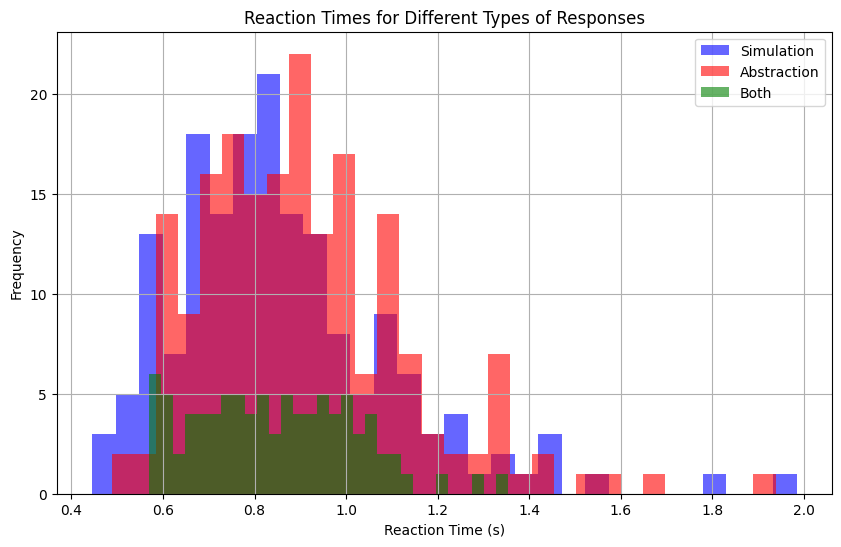

In [84]:
# Do some plotting work for the reaction times of the three different types of responses
rt_dubs = get_rt(all_subs, hypothesis = "both", include_dubtrials="only", return_df=True)
rt_separate = get_rt(all_subs, hypothesis = "both", include_dubtrials=False, return_df=True)
sim_rt = rt_separate["simulation"]["rt"]
abs_rt = rt_separate["abstraction"]["rt"]
both_rt = rt_dubs["sim + abs"]["rt"]

# plot the data
plt.figure(figsize=(10, 6))
plt.hist(sim_rt, bins=30, alpha=0.6, color='blue', label="Simulation")
plt.hist(abs_rt, bins=30, alpha=0.6, color='red', label="Abstraction")
plt.hist(both_rt, bins=30, alpha=0.6, color='green', label="Both")
plt.title("Reaction Times for Different Types of Responses")
plt.xlabel("Reaction Time (s)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
import sys, os

In [4]:
!{sys.executable} -m pip install seaborn

DEPRECATION: Loading egg at /Users/wiegerscheurer/miniconda3/envs/wieg_env_nsd/lib/python3.11/site-packages/pycocotools-2.0-py3.11-macosx-11.0-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/wiegerscheurer/miniconda3/envs/wieg_env_nsd/lib/python3.11/site-packages/cifti-1.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [44]:
all_subs

,Unnamed: 0,trial,ball_speed,interactor,bounce,bounce_moment,random_bounce_direction,target_onset,speed_change,ball_change,...,start_pos,end_pos,abs_rfup,abs_rfright,abs_rfdown,abs_rfleft,sim_rfup,sim_rfright,sim_rfdown,sim_rfleft
0,0.0,1,7.5,45_top_r,False,NaN,NaN,4.075463,slower,True,...,left,right,"(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)","(0, 0)"
1,1.0,2,7.5,45_top_r,True,3.870897,NaN,3.992594,slower,True,...,left,down,"(0, 0)","(1, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)"
2,2.0,3,8.5,45_top_u,True,3.856596,NaN,NaN,NaN,False,...,down,left,"(1, 0)","(0, 0)","(0, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)"
3,3.0,4,8.5,none_u,True,NaN,left,NaN,NaN,False,...,down,left,"(1, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)","(0, 0)","(0, 0)","(0, 1)"
4,4.0,5,8.0,45_top_r,False,NaN,NaN,4.021890,faster,True,...,left,right,"(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)","(0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,NaN,146,8.0,none_l,False,NaN,NaN,NaN,NaN,False,...,right,left,"(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)"
1196,NaN,147,8.5,45_bottom_d,False,NaN,NaN,3.721376,faster,True,...,up,down,"(0, 0)","(0, 0)","(1, 1)","(0, 0)","(0, 0)","(1, 0)","(0, 1)","(0, 0)"
1197,NaN,148,8.0,none_d,False,NaN,NaN,NaN,NaN,False,...,up,down,"(0, 0)","(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)"
1198,NaN,149,8.5,135_top_u,False,NaN,NaN,3.742895,faster,True,...,down,up,"(1, 1)","(0, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)","(0, 0)","(0, 0)"


In [238]:


rt_dubs = get_rt(all_subs, hypothesis="both", include_dubtrials="only", return_df=True)
rt_separate = get_rt(all_subs, hypothesis="both", include_dubtrials=False, return_df=True)
sim_rt = rt_separate["simulation"]["rt"]
abs_rt = rt_separate["abstraction"]["rt"]
both_rt = rt_dubs["sim + abs"]["rt"]

# Combine the data into a single DataFrame
data = pd.DataFrame({
    'Reaction Time': pd.concat([sim_rt, abs_rt, both_rt]),
    'Type': ['Simulation'] * len(sim_rt) + ['Abstraction'] * len(abs_rt) + ['Both'] * len(both_rt)
})

# Create the plot
fig = go.Figure()


fig.add_trace(go.Violin(x=data['Type'][data['Type'] == 'Both'],
                        y=data['Reaction Time'][data['Type'] == 'Both'],
                        name='Both',
                        box_visible=True,
                        meanline_visible=True,
                        points='all',
                        jitter=0.25,
                        pointpos=-1.5,
                        line_color='green'))

# Add violin plots
fig.add_trace(go.Violin(x=data['Type'][data['Type'] == 'Simulation'],
                        y=data['Reaction Time'][data['Type'] == 'Simulation'],
                        name='Simulation',
                        box_visible=True,
                        meanline_visible=True,
                        points='all',
                        jitter=0.25,
                        pointpos=-1.5,
                        line_color='blue'))

fig.add_trace(go.Violin(x=data['Type'][data['Type'] == 'Abstraction'],
                        y=data['Reaction Time'][data['Type'] == 'Abstraction'],
                        name='Abstraction',
                        box_visible=True,
                        meanline_visible=True,
                        points='all',
                        jitter=0.25,
                        pointpos=-1.5,
                        line_color='red'))



# Update layout
fig.update_layout(
    # title="Reaction Times for Different Types of Responses",
    title=f"Reaction Times for Different Types of Responses",
    xaxis_title="Type of Response",
    yaxis_title="Reaction Time (s)",
    violingap=0.2,
    violingroupgap=0.3,
    violinmode='overlay',
    height=1200
)

fig.show()

In [21]:
fast_balls = all_subs[all_subs["ball_speed"] == 8.5]
mid_balls = all_subs[all_subs["ball_speed"] == 8]
slow_balls = all_subs[all_subs["ball_speed"] == 7.5]

all_speeds = [fast_balls, mid_balls, slow_balls]

In [22]:
for speed in all_speeds:
    rt_dubs = get_rt(speed, hypothesis = "both", include_dubtrials="only", return_df=False)
    rt_sep = get_rt(speed, hypothesis = "both", include_dubtrials=False, return_df=False)

    print(rt_dubs, rt_sep)


{'sim + abs': 0.8354118894203566} {'simulation': 0.8727899008267559, 'abstraction': 0.9325931318622979}
{'sim + abs': 0.8495744611408251} {'simulation': 0.8506503150195137, 'abstraction': 0.8976447438471951}
{'sim + abs': 0.8513267348506347} {'simulation': 0.8668004931755026, 'abstraction': 0.8878675042375354}


In [150]:
import pandas as pd
import plotly.graph_objects as go

# Create an empty list to store all data frames
all_data = []

ball_speed_order = ["fast", "mid", "slow"]

# Loop through all speeds
for speed_idx, speed in enumerate(all_speeds):
    # Get your data as before
    rt_dubs = get_rt(speed, hypothesis="both", include_dubtrials="only", return_df=True)
    rt_separate = get_rt(speed, hypothesis="both", include_dubtrials=False, return_df=True)
    sim_rt = rt_separate["simulation"]["rt"]
    abs_rt = rt_separate["abstraction"]["rt"]
    both_rt = rt_dubs["sim + abs"]["rt"]
    
    # Create a DataFrame with a speed column to differentiate the iterations
    speed_name = ball_speed_order[speed_idx]
    
    sim_df = pd.DataFrame({
        'Reaction Time': sim_rt,
        'Type': 'Simulation',
        'Speed': speed_name
    })
    
    abs_df = pd.DataFrame({
        'Reaction Time': abs_rt,
        'Type': 'Abstraction',
        'Speed': speed_name
    })
    
    both_df = pd.DataFrame({
        'Reaction Time': both_rt,
        'Type': 'Both',
        'Speed': speed_name
    })
    
    # Append all DataFrames to our list
    all_data.extend([sim_df, abs_df, both_df])

# Combine all the data into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Create the plot
fig = go.Figure()

# Define colors and positions for each condition
colors = {'fast': 'rgba(31, 119, 180, 0.7)', 'mid': 'rgba(255, 127, 14, 0.7)', 'slow': 'rgba(44, 160, 44, 0.7)'}
types = ['Simulation', 'Abstraction', 'Both']

# Add all violin plots grouped by Type and colored by Speed
for i, type_name in enumerate(types):
    for j, speed_name in enumerate(ball_speed_order):
        subset = combined_data[(combined_data['Type'] == type_name) & (combined_data['Speed'] == speed_name)]
        
        # Calculate position with offset for each speed within a type group
        position = i + (j - 1) * 0.25
        
        fig.add_trace(go.Violin(
            x=[position] * len(subset),  # Position on x-axis
            y=subset['Reaction Time'],
            name=f"{speed_name} {type_name}",
            box_visible=True,
            meanline_visible=True,
            points='all',
            jitter=0.1,
            pointpos=0,
            line_color=colors[speed_name],
            showlegend=True,
            side='positive',
            width=0.2,
            spanmode='soft'
        ))

# Add mean lines for each type per condition
for i, type_name in enumerate(types):
    for j, speed_name in enumerate(ball_speed_order):
        subset = combined_data[(combined_data['Type'] == type_name) & (combined_data['Speed'] == speed_name)]
        mean_rt = subset['Reaction Time'].mean()
        
        # Calculate position with offset for each speed within a type group
        position = i + (j - 1) * 0.25
        
        fig.add_trace(go.Scatter(
            x=[position - 0.1, position + 0.1],
            y=[mean_rt, mean_rt],
            mode='lines',
            line=dict(color='black', width=2),
            name=f"Mean {speed_name} {type_name}",
            showlegend=False
        ))

# Update layout
fig.update_layout(
    title="Reaction Times by Type and Speed",
    yaxis_title="Reaction Time (s)",
    violinmode='overlay',
    height=800,
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1, 2],
        ticktext=types,
        title="Type of Response"
    ),
    legend_title="Speed Condition",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)

fig.show()

In [135]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Create an empty list to store all data frames
all_data = []

# Generate a colormap
cmap = plt.get_cmap('tab10')  # You can choose a different colormap if you prefer

# Create the colors dictionary
colors = {name: f'rgba({int(cmap(i)[0]*255)}, {int(cmap(i)[1]*255)}, {int(cmap(i)[2]*255)}, 0.7)' 
          for i, name in enumerate(all_sub_names)}

# Store means for each subject and type for line connections
means_data = {sub_name: {} for sub_name in all_sub_names}
positions_data = {sub_name: {} for sub_name in all_sub_names}

# Loop through all speeds
for sub_idx, sub in enumerate(all_sub_dfs):
    # Get your data as before
    rt_dubs = get_rt(sub, hypothesis="both", include_dubtrials="only", return_df=True)
    rt_separate = get_rt(sub, hypothesis="both", include_dubtrials=False, return_df=True)
    sim_rt = rt_separate["simulation"]["rt"]
    abs_rt = rt_separate["abstraction"]["rt"]
    both_rt = rt_dubs["sim + abs"]["rt"]
    
    # Create a DataFrame with a speed column to differentiate the iterations
    sub_name = all_sub_names[sub_idx]
    
    # Calculate means and store them
    means_data[sub_name]['Simulation'] = np.mean(sim_rt)
    means_data[sub_name]['Abstraction'] = np.mean(abs_rt)
    means_data[sub_name]['Both'] = np.mean(both_rt)
    
    sim_df = pd.DataFrame({
        'Reaction Time': sim_rt,
        'Type': 'Simulation',
        'Speed': sub_name
    })
    
    abs_df = pd.DataFrame({
        'Reaction Time': abs_rt,
        'Type': 'Abstraction',
        'Speed': sub_name
    })
    
    both_df = pd.DataFrame({
        'Reaction Time': both_rt,
        'Type': 'Both',
        'Speed': sub_name
    })
    
    # Append all DataFrames to our list
    all_data.extend([sim_df, abs_df, both_df])

# Combine all the data into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Create the plot
fig = go.Figure()

types = ['Simulation', 'Abstraction', 'Both']

# Add all violin plots grouped by Type and colored by Speed
for i, type_name in enumerate(types):
    for j, sub_name in enumerate(all_sub_names):
        subset = combined_data[(combined_data['Type'] == type_name) & (combined_data['Speed'] == sub_name)]
        
        # Calculate position with offset for each speed within a type group
        position = i + (j - 1) * 0.11
        
        # Store position for later line plotting
        positions_data[sub_name][type_name] = position
        
        fig.add_trace(go.Violin(
            x=[position] * len(subset),  # Position on x-axis
            y=subset['Reaction Time'],
            name=f"{sub_name} {type_name[:4]}",
            box_visible=True,
            meanline_visible=True,
            points='all',
            jitter=0.1,
            pointpos=0,
            line_color=colors[sub_name],
            showlegend=True,
            side='positive',
            width=0.2,
            spanmode='soft'
        ))

# Add connecting lines between means for each subject
for sub_name in all_sub_names:
    # Create x and y coordinates for the line
    x_values = [positions_data[sub_name][type_name] for type_name in types]
    y_values = [means_data[sub_name][type_name] for type_name in types]
    
    # Add the connecting line
    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        mode='lines',
        # line=dict(color=colors[sub_name], width=2, dash='dash'),
        line=dict(color=colors[sub_name], width=5, dash='solid'),
        showlegend=False,  # Don't show in legend since we already have the violin plots
        hoverinfo='none'   # Disable hover info for the lines
    ))
    
    # Add markers at each mean point for clarity
    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        mode='markers',
        marker=dict(color=colors[sub_name], size=8),
        showlegend=False,
        hoverinfo='y',
        hovertemplate='Mean: %{y:.3f}s<extra></extra>'
    ))

# Update layout
fig.update_layout(
    title="Reaction Times with Connected Means",
    yaxis_title="Reaction Time (s)",
    violinmode='overlay',
    height=1400,
    width=1600,
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1, 2],
        ticktext=types,
        title="Type of Response"
    ),
    legend_title="Subjects",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)

fig.show()

In [137]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

# Create an empty list to store all data frames
all_data = []

# Define types and their colors
types = ['Simulation', 'Abstraction', 'Both']
type_colors = {
    'Simulation': 'rgba(31, 119, 180, 0.7)',  # Blue
    'Abstraction': 'rgba(255, 127, 14, 0.7)',  # Orange
    'Both': 'rgba(44, 160, 44, 0.7)'  # Green
}

# Store means for each subject and type for line connections
means_data = {sub_name: {} for sub_name in all_sub_names}
positions_data = {sub_name: {} for sub_name in all_sub_names}

# Loop through all subjects
for sub_idx, sub in enumerate(all_sub_dfs):
    # Get your data as before
    rt_dubs = get_rt(sub, hypothesis="both", include_dubtrials="only", return_df=True)
    rt_separate = get_rt(sub, hypothesis="both", include_dubtrials=False, return_df=True)
    sim_rt = rt_separate["simulation"]["rt"]
    abs_rt = rt_separate["abstraction"]["rt"]
    both_rt = rt_dubs["sim + abs"]["rt"]
    
    # Create a DataFrame with a subject column
    sub_name = all_sub_names[sub_idx]
    
    # Calculate means and store them
    means_data[sub_name]['Simulation'] = np.mean(sim_rt)
    means_data[sub_name]['Abstraction'] = np.mean(abs_rt)
    means_data[sub_name]['Both'] = np.mean(both_rt)
    
    sim_df = pd.DataFrame({
        'Reaction Time': sim_rt,
        'Type': 'Simulation',
        'Subject': sub_name
    })
    
    abs_df = pd.DataFrame({
        'Reaction Time': abs_rt,
        'Type': 'Abstraction',
        'Subject': sub_name
    })
    
    both_df = pd.DataFrame({
        'Reaction Time': both_rt,
        'Type': 'Both',
        'Subject': sub_name
    })
    
    # Append all DataFrames to our list
    all_data.extend([sim_df, abs_df, both_df])

# Combine all the data into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Create the plot
fig = go.Figure()

# Add all violin plots grouped by Subject and colored by Type
for i, sub_name in enumerate(all_sub_names):
    for j, type_name in enumerate(types):
        subset = combined_data[(combined_data['Subject'] == sub_name) & (combined_data['Type'] == type_name)]
        
        # Calculate position with offset for each type within a subject group
        position = i + (j - 1) * 0.25
        
        # Store position for later line plotting
        positions_data[sub_name][type_name] = position
        
        fig.add_trace(go.Violin(
            x=[position] * len(subset),  # Position on x-axis
            y=subset['Reaction Time'],
            name=f"{type_name}",
            legendgroup=type_name,  # Group legend entries by type
            showlegend=i == 0,      # Only show in legend once per type
            box_visible=True,
            meanline_visible=True,
            points='all',
            jitter=0.1,
            pointpos=0,
            line_color=type_colors[type_name],
            side='positive',
            width=0.4,
            spanmode='soft'
        ))

# Add connecting lines between means for each subject
for sub_name in all_sub_names:
    # Create x and y coordinates for the line
    x_values = [positions_data[sub_name][type_name] for type_name in types]
    y_values = [means_data[sub_name][type_name] for type_name in types]
    
    # Add the connecting line
    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        mode='lines',
        line=dict(color='rgba(0, 0, 0, 0.5)', width=8, dash='solid'),  # Gray dashed line
        showlegend=False,  # Don't show in legend
        hoverinfo='none'   # Disable hover info for the lines
    ))
    
    # Add markers at each mean point
    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        mode='markers',
        marker=dict(
            color=['rgba(31, 119, 180, 1)', 'rgba(255, 127, 14, 1)', 'rgba(44, 160, 44, 1)'],  # Match type colors
            size=8
        ),
        showlegend=False,
        hoverinfo='y',
        hovertemplate='Mean: %{y:.3f}s<extra></extra>'
    ))

# Update layout
fig.update_layout(
    title="Reaction Times by Subject with Connected Means",
    yaxis_title="Reaction Time (s)",
    violinmode='overlay',
    height=900,
    width=1600,
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(len(all_sub_names))),
        ticktext=all_sub_names,
        title="Subject"
    ),
    legend_title="Response Type",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)

fig.show()

In [ ]:
overall

In [25]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

# Create an empty list to store all data frames
all_data = []

# Define types and their colors
types = ['Simulation', 'Abstraction', 'Both']
type_colors = {
    'Simulation': 'rgba(31, 119, 180, 0.7)',  # Blue
    'Abstraction': 'rgba(255, 127, 14, 0.7)',  # Orange
    'Both': 'rgba(44, 160, 44, 0.7)'  # Green
}

# Store means for each subject and type for line connections
means_data = {sub_name: {} for sub_name in all_sub_names}
positions_data = {sub_name: {} for sub_name in all_sub_names}

# Loop through all subjects
for sub_idx, sub in enumerate(all_sub_dfs):
    # Get your data as before
    rt_dubs = get_rt(sub, hypothesis="both", include_dubtrials="only", return_df=True)
    rt_separate = get_rt(sub, hypothesis="both", include_dubtrials=False, return_df=True)
    sim_rt = rt_separate["simulation"]["rt"]
    abs_rt = rt_separate["abstraction"]["rt"]
    both_rt = rt_dubs["sim + abs"]["rt"]
    
    # Create a DataFrame with a subject column
    sub_name = all_sub_names[sub_idx]
    
    # Calculate means and store them
    means_data[sub_name]['Simulation'] = np.mean(sim_rt)
    means_data[sub_name]['Abstraction'] = np.mean(abs_rt)
    means_data[sub_name]['Both'] = np.mean(both_rt)
    
    sim_df = pd.DataFrame({
        'Reaction Time': sim_rt,
        'Type': 'Simulation',
        'Subject': sub_name
    })
    
    abs_df = pd.DataFrame({
        'Reaction Time': abs_rt,
        'Type': 'Abstraction',
        'Subject': sub_name
    })
    
    both_df = pd.DataFrame({
        'Reaction Time': both_rt,
        'Type': 'Both',
        'Subject': sub_name
    })
    
    # Append all DataFrames to our list
    all_data.extend([sim_df, abs_df, both_df])

# Combine all the data into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Create the plot
fig = go.Figure()

# Add all violin plots grouped by Subject and colored by Type
for i, sub_name in enumerate(all_sub_names):
    for j, type_name in enumerate(types):
        subset = combined_data[(combined_data['Subject'] == sub_name) & (combined_data['Type'] == type_name)]
        
        # Calculate position with offset for each type within a subject group
        position = i + (j - 1) * 0.25
        
        # Store position for later line plotting
        positions_data[sub_name][type_name] = position
        
        fig.add_trace(go.Violin(
            x=[position] * len(subset),  # Position on x-axis
            y=subset['Reaction Time'],
            name=f"{type_name}",
            legendgroup=type_name,  # Group legend entries by type
            showlegend=i == 0,      # Only show in legend once per type
            box_visible=True,
            meanline_visible=True,
            points='all',
            jitter=0.1,
            pointpos=0,
            line_color=type_colors[type_name],
            side='positive',
            width=0.4,
            spanmode='soft'
        ))

# Add connecting lines between means for each subject
for sub_name in all_sub_names:
    # Create x and y coordinates for the line
    x_values = [positions_data[sub_name][type_name] for type_name in types]
    y_values = [means_data[sub_name][type_name] for type_name in types]
    
    # Add the connecting line
    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        mode='lines',
        line=dict(color='rgba(0, 0, 0, 0.5)', width=8, dash='solid'),  # Gray dashed line
        showlegend=False,  # Don't show in legend
        hoverinfo='none'   # Disable hover info for the lines
    ))
    
    # Add markers at each mean point
    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        mode='markers',
        marker=dict(
            color=['rgba(31, 119, 180, 1)', 'rgba(255, 127, 14, 1)', 'rgba(44, 160, 44, 1)'],  # Match type colors
            size=8
        ),
        showlegend=False,
        hoverinfo='y',
        hovertemplate='Mean: %{y:.3f}s<extra></extra>'
    ))

# Update layout
fig.update_layout(
    title="Reaction Times by Subject with Connected Means",
    yaxis_title="Reaction Time (s)",
    violinmode='overlay',
    height=900,
    width=1600,
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(len(all_sub_names))),
        ticktext=all_sub_names,
        title="Subject"
    ),
    legend_title="Response Type",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)

fig.show()

['melvin', 'paulo', 'yifan', 'ann', 'qifei', 'mingyao', 'bilge', 'yanni']

In [138]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Create an empty list to store all data frames
all_data = []

# Define types and their colors
types = ['Abstraction', 'Simulation', 'Both']
# type_colors = {
#     'Simulation': 'rgba(31, 119, 180, 0.7)',  # Blue
#     'Abstraction': 'rgba(255, 127, 14, 0.7)',  # Orange
#     'Both': 'rgba(44, 160, 44, 0.7)'  # Green
# }

# Generate a colormap
cmap = plt.get_cmap('Blues')  # You can choose a different colormap if you prefer
col_factor = 50
col_icept = 150
# Create the colors dictionary
type_colors = {name: f'rgba({int(cmap(i*col_factor + col_icept)[0]*255)}, {int(cmap(i*col_factor + col_icept)[1]*255)}, {int(cmap(i*col_factor + col_icept)[2]*255)}, 0.5)' 
          for i, name in enumerate(types)}

# Loop through all subjects (using the same structure as your original code)
for sub_idx, sub in enumerate(all_sub_dfs):
    # Get your data as before
    rt_dubs = get_rt(sub, hypothesis="both", include_dubtrials="only", return_df=True)
    rt_separate = get_rt(sub, hypothesis="both", include_dubtrials=False, return_df=True)
    sim_rt = rt_separate["simulation"]["rt"]
    abs_rt = rt_separate["abstraction"]["rt"]
    both_rt = rt_dubs["sim + abs"]["rt"]
    
    # Create DataFrames without subject column - we'll aggregate across all subjects
    sim_df = pd.DataFrame({
        'Reaction Time': sim_rt,
        'Type': 'Simulation'
    })
    
    abs_df = pd.DataFrame({
        'Reaction Time': abs_rt,
        'Type': 'Abstraction'
    })
    
    both_df = pd.DataFrame({
        'Reaction Time': both_rt,
        'Type': 'Both'
    })
    
    # Append all DataFrames to our list
    all_data.extend([abs_df, sim_df, both_df])

# Combine all the data into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Calculate mean reaction time for each type
type_means = combined_data.groupby('Type')['Reaction Time'].mean().to_dict()

# Create the plot
fig = go.Figure()

# Add violin plots for each type
for i, type_name in enumerate(types):
    subset = combined_data[combined_data['Type'] == type_name]
    
    fig.add_trace(go.Violin(
        x=[type_name] * len(subset),  # Use type name directly as x value
        y=subset['Reaction Time'],
        name=type_name,
        legendgroup=type_name,
        showlegend=True,
        box_visible=True,
        meanline_visible=True,
        points='all',
        jitter=0.2,
        pointpos=0.5,
        line_color=type_colors[type_name],
        side='negative',
        width=.5,
        spanmode='soft'
    ))

# Connect the means with a line
fig.add_trace(go.Scatter(
    x=types,
    y=[type_means[t] for t in types],
    mode='lines+markers',
    line=dict(color='rgba(0, 0, 0, 0.7)', width=8),
    marker=dict(
        size=10,
        color=[type_colors[t].replace('0.7', '1') for t in types],
        line=dict(color='black', width=4)
    ),
    name='Mean RT',
    hovertemplate='Mean: %{y:.3f}s<extra></extra>'
))

# Update layout
fig.update_layout(
    title="Average Reaction Times Across All Subjects",
    yaxis_title="Reaction Time (s)",
    violinmode='overlay',
    height=1200,
    width=1200,
    xaxis=dict(
        title="Response Type",
        tickmode='array',
        tickvals=types
    ),
    legend_title="Response Type",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )

)

# Add annotations for the mean values
for i, type_name in enumerate(types):
    fig.add_annotation(
        x=type_name,
        y=type_means[type_name],
        text=f"{type_means[type_name]:.3f}s",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor='black',
        ax=120,
        ay=-90,
        font=dict(size=25, color='black', family='Arial')

    )

fig.show()

In [176]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Create an empty list to store all data frames
all_data = []

# Define types and their colors
types = ['Abstraction', 'Simulation', 'Both']

# Generate a colormap
cmap = plt.get_cmap('YlOrRd')  # You can choose a different colormap if you prefer
col_factor = 50
col_icept = 150
# Create the colors dictionary
type_colors = {name: f'rgba({int(cmap(i*col_factor + col_icept)[0]*255)}, {int(cmap(i*col_factor + col_icept)[1]*255)}, {int(cmap(i*col_factor + col_icept)[2]*255)}, 0.5)' 
          for i, name in enumerate(types)}

# Loop through all subjects (using the same structure as your original code)
for sub_idx, sub in enumerate(all_sub_dfs):
    # Get your data as before
    rt_dubs = get_rt(sub, hypothesis="both", include_dubtrials="only", return_df=True)
    rt_separate = get_rt(sub, hypothesis="both", include_dubtrials=False, return_df=True)
    sim_rt = rt_separate["simulation"]["rt"]
    abs_rt = rt_separate["abstraction"]["rt"]
    both_rt = rt_dubs["sim + abs"]["rt"]
    
    # Create DataFrames without subject column - we'll aggregate across all subjects
    sim_df = pd.DataFrame({
        'Reaction Time': sim_rt,
        'Type': 'Simulation'
    })
    
    abs_df = pd.DataFrame({
        'Reaction Time': abs_rt,
        'Type': 'Abstraction'
    })
    
    both_df = pd.DataFrame({
        'Reaction Time': both_rt,
        'Type': 'Both'
    })
    
    # Append all DataFrames to our list
    all_data.extend([abs_df, sim_df, both_df])

# Combine all the data into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Calculate mean reaction time for each type
type_means = combined_data.groupby('Type')['Reaction Time'].mean().to_dict()

# Create the plot
fig = go.Figure()

# Add violin plots for each type
for i, type_name in enumerate(types):
    subset = combined_data[combined_data['Type'] == type_name]
    
    fig.add_trace(go.Violin(
        x=[type_name] * len(subset),  # Use type name directly as x value
        y=subset['Reaction Time'],
        name=type_name,
        legendgroup=type_name,
        showlegend=True,
        box_visible=True,
        meanline_visible=True,
        points='all',
        jitter=0.2,
        pointpos=0.5,
        line_color=type_colors[type_name],
        side='negative',
        width=.5,
        spanmode='soft'
    ))

# Connect the means with a line
fig.add_trace(go.Scatter(
    x=types,
    y=[type_means[t] for t in types],
    mode='lines+markers',
    line=dict(color='rgba(0, 0, 0, 0.7)', width=8),
    marker=dict(
        size=14,  # Increased marker size
        color=[type_colors[t].replace('0.5', '1') for t in types],
        line=dict(color='black', width=4)
    ),
    name='Mean RT',
    hovertemplate='Mean: %{y:.3f}s<extra></extra>'
))

# Define a common font style for consistent text appearance
font_style = dict(
    family="Arial, sans-serif",
    size=20,  # Larger font size
    color="black"
)

# Update layout with enhanced text styling
fig.update_layout(
    title=dict(
        text="Average Reaction Times Across All Subjects\n\n",
        font=dict(size=25, family="Arial, sans-serif", color="black"),
        x=0.5,
        y=.985
    ),
    yaxis=dict(
        title=dict(
            text="Reaction Time (s)",
            font=font_style
        ),
        tickfont=font_style,
        tickwidth=2,
        showline=True,
        linewidth=3,
        linecolor='black'
    ),
    xaxis=dict(
        title=dict(
            text="Response Type",
            font=font_style
        ),
        tickmode='array',
        tickvals=types,
        tickfont=font_style,
        tickwidth=2,
        showline=True,
        linewidth=3,
        linecolor='black'
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.01,
        xanchor="center",
        x=0.5,
        font=dict(size=18, family="Arial, sans-serif"),
        borderwidth=2,
        bordercolor="White",
        title=dict(
            text="Response Type",
            font=dict(size=18, family="Arial, sans-serif")
        )
    ),
    violinmode='overlay',
    height=1200,
    width=1200,
    font=font_style,  # Default font for all other text elements
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Add annotations for the mean values
for i, type_name in enumerate(types):
    fig.add_annotation(
        x=type_name,
        y=type_means[type_name],
        text=f"{type_means[type_name]:.3f}s",
        showarrow=True,
        arrowhead=2,
        arrowsize=1.5,  # Slightly larger arrowhead
        arrowwidth=3,    # Thicker arrow
        arrowcolor='black',
        ax=120,
        ay=-90,
        font=dict(size=25, color='black', family="Arial, sans-serif")
    )

# Make the axis lines thicker
fig.update_xaxes(mirror=True, ticks='outside', tickwidth=3, ticklen=10, showgrid=False)
fig.update_yaxes(mirror=True, ticks='outside', tickwidth=3, ticklen=10, showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

In [192]:
!{sys.executable} -m pip install bambi arviz pymc

DEPRECATION: Loading egg at /Users/wiegerscheurer/miniconda3/envs/wieg_env_nsd/lib/python3.11/site-packages/pycocotools-2.0-py3.11-macosx-11.0-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/wiegerscheurer/miniconda3/envs/wieg_env_nsd/lib/python3.11/site-packages/cifti-1.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

In [210]:
combined_data
# remove all the nan values
combined_data = combined_data.dropna()

combined_data.columns = ['rt', 'type']

combined_data

,rt,type
0,1.116843,Abstraction
1,1.315073,Abstraction
4,0.983995,Abstraction
5,0.847546,Abstraction
6,0.875950,Abstraction
...,...,...
506,0.783957,Both
507,0.721450,Both
508,0.636002,Both
509,0.613000,Both


In [233]:
sim_abs_data = combined_data[combined_data['type'] != 'None']


sim_abs_data

,rt,type
0,1.116843,Abstraction
1,1.315073,Abstraction
4,0.983995,Abstraction
5,0.847546,Abstraction
6,0.875950,Abstraction
...,...,...
506,0.783957,Both
507,0.721450,Both
508,0.636002,Both
509,0.613000,Both


In [236]:
import scipy.stats as stats
this_dat = sim_abs_data


stat, p = stats.levene(
    this_dat.loc[this_dat["type"] == "Simulation", "rt"],
    this_dat.loc[this_dat["type"] == "Abstraction", "rt"],
    # this_dat.loc[this_dat["type"] == "Both", "rt"]
    # Add other groups here if you have more than 2
)

print(f"Levene's test: W={stat:.3f}, p={p:.3f}")


import pingouin as pg

anova_results = pg.anova(data=this_dat, dv="rt", between="type", detailed=True)
print(anova_results)


Levene's test: W=0.073, p=0.787
   Source         SS   DF        MS         F   p-unc      np2
0    type   0.317028    2  0.158514  3.111402  0.0455  0.01367
1  Within  22.874815  449  0.050946       NaN     NaN      NaN


In [237]:
posthoc = pg.pairwise_tukey(data=combined_data, dv="rt", between="type")
print(posthoc)


             A           B   mean(A)   mean(B)      diff        se         T  \
0  Abstraction        Both  0.909020  0.846087  0.062933  0.028944  2.174289   
1  Abstraction  Simulation  0.909020  0.862318  0.046702  0.023733  1.967762   
2         Both  Simulation  0.846087  0.862318 -0.016232  0.029502 -0.550189   

    p-tukey    hedges  
0  0.076736  0.294717  
1  0.121440  0.196893  
2  0.846434 -0.072462  


In [235]:
import bambi as bmb
import pymc as pm

# Define the full model
full_model = bmb.Model("rt ~ type", data=this_dat, family="gaussian")

# Fit the full model
full_results = full_model.fit(draws=5000, cores=10)

# Define the null model (just the intercept, no predictors)
null_model = bmb.Model("rt ~ 1", data=this_dat, family="gaussian")

# Fit the null model
null_results = null_model.fit(draws=5000, cores=10)

# Extract the log-posterior (lp) for both models
lp_full = full_results.sample_stats['lp'].mean()
lp_null = null_results.sample_stats['lp'].mean()

# Calculate the Bayes Factor (difference in log-posterior)
bayes_factor = lp_full - lp_null
print("Bayes Factor:", bayes_factor)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [sigma, Intercept, type]


Output()

Sampling 10 chains for 1_000 tune and 5_000 draw iterations (10_000 + 50_000 draws total) took 4 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [sigma, Intercept]


Output()

Sampling 10 chains for 1_000 tune and 5_000 draw iterations (10_000 + 50_000 draws total) took 4 seconds.


Bayes Factor: <xarray.DataArray 'lp' ()> Size: 8B
array(0.88980328)


In [183]:
import scipy.stats as stats
import pingouin as pg
import numpy as np

# Prepare data: Ensure it's in long format (each row = one trial, with 'Subject' and 'Type' columns)

# Check normality for each condition
for cond in types:
    stat, p = stats.shapiro(combined_data[combined_data["Type"] == cond]["Reaction Time"])
    print(f"Shapiro-Wilk test for {cond}: W={stat:.3f}, p={p:.3f}")

# Check homogeneity of variance
stat, p = stats.levene(
    combined_data[combined_data["Type"] == "Abstraction"]["Reaction Time"],
    combined_data[combined_data["Type"] == "Simulation"]["Reaction Time"],
    combined_data[combined_data["Type"] == "Both"]["Reaction Time"]
)
print(f"Levene's test for equal variances: W={stat:.3f}, p={p:.3f}")

# Perform repeated-measures ANOVA
anova_results = pg.rm_anova(data=combined_data, dv="Reaction Time", within="Type", subject="Subject", detailed=True)
print(anova_results)

# If significant, do pairwise post-hoc comparisons
posthoc = pg.pairwise_ttests(data=combined_data, dv="Reaction Time", within="Type", subject="Subject", 
                             padjust="bonf")  # Bonferroni correction
print(posthoc)


Shapiro-Wilk test for Abstraction: W=0.942, p=0.000
Shapiro-Wilk test for Simulation: W=0.919, p=0.000
Shapiro-Wilk test for Both: W=0.973, p=0.059
Levene's test for equal variances: W=1.713, p=0.182


KeyError: 'Subject'

In [29]:
for subj_idx, subj_name in enumerate(all_sub_names):
    
    subj = get_data(subject=f"sub-{subj_name}", task = "ball_hue")


    prec = get_precision(subj, hypothesis = "both", include_dubtrials=False, return_df=False)
    sens = get_sensitivity(subj, hypothesis = "both", include_dubtrials=False, return_df=False)
    f1 = get_f1_score(subj, hypothesis = "both", include_dubtrials=False, return_df=False)
    acc = get_accuracy(subj, hypothesis = "both", include_dubtrials=False, return_df=False)

    print(f"Precision: {prec}")
    print(f"Sensitivity: {sens}")
    print(f"F1 score: {f1}")
    print(f"Accuracy: {acc}")


    rt = get_rt(subj, hypothesis = "both", include_dubtrials=False, return_df=False, only_correct=False)
    rt_dubs = get_rt(subj, hypothesis = "both", include_dubtrials="only", return_df=False, only_correct=False)


    rt_cor = get_rt(subj, hypothesis = "both", include_dubtrials=False, return_df=False, only_correct=True)
    rt_dubs_cor = get_rt(subj, hypothesis = "both", include_dubtrials="only", return_df=False, only_correct=True)
    
    # print(rt, rt_dubs)
    # print(rt_cor, rt_dubs_cor)



Precision: {'simulation': 0.7575757575757576, 'abstraction': 0.7777777777777778}
Sensitivity: {'simulation': 0.8620689655172413, 'abstraction': 0.84}
F1 score: {'simulation': 0.8064516129032258, 'abstraction': 0.8076923076923077}
Accuracy: {'simulation': 0.84, 'abstraction': 0.8653846153846154}
Precision: {'simulation': 0.65625, 'abstraction': 0.75}
Sensitivity: {'simulation': 0.84, 'abstraction': 0.8571428571428571}
F1 score: {'simulation': 0.736842105263158, 'abstraction': 0.7999999999999999}
Accuracy: {'simulation': 0.7884615384615384, 'abstraction': 0.84}
Precision: {'simulation': 0.8461538461538461, 'abstraction': 0.7931034482758621}
Sensitivity: {'simulation': 0.9166666666666666, 'abstraction': 0.9583333333333334}
F1 score: {'simulation': 0.8799999999999999, 'abstraction': 0.8679245283018867}
Accuracy: {'simulation': 0.9230769230769231, 'abstraction': 0.86}
Precision: {'simulation': 0.8571428571428571, 'abstraction': 0.696969696969697}
Sensitivity: {'simulation': 0.85714285714285

In [151]:
for sub_idx, sub_df in enumerate(all_sub_dfs):
    
    prec_dubs = get_precision(sub_df, hypothesis="both", include_dubtrials="only", return_df=False)
    prec_separate = get_precision(sub_df, hypothesis="both", include_dubtrials=False, return_df=False)

    sim_prec = prec_separate["simulation"]
    abs_prec = prec_separate["abstraction"]
    both_prec = prec_dubs["sim + abs"]
    print(sim_prec, abs_prec, both_prec)



0.7575757575757576 0.7777777777777778 0.8461538461538461
0.65625 0.75 0.8461538461538461
0.8461538461538461 0.7931034482758621 1.0
0.8571428571428571 0.696969696969697 0.6923076923076923
0.7407407407407407 0.8125 1.0
0.9166666666666666 0.8928571428571429 0.8888888888888888
0.9565217391304348 0.9642857142857143 0.8571428571428571
0.525 0.6875 0.8571428571428571


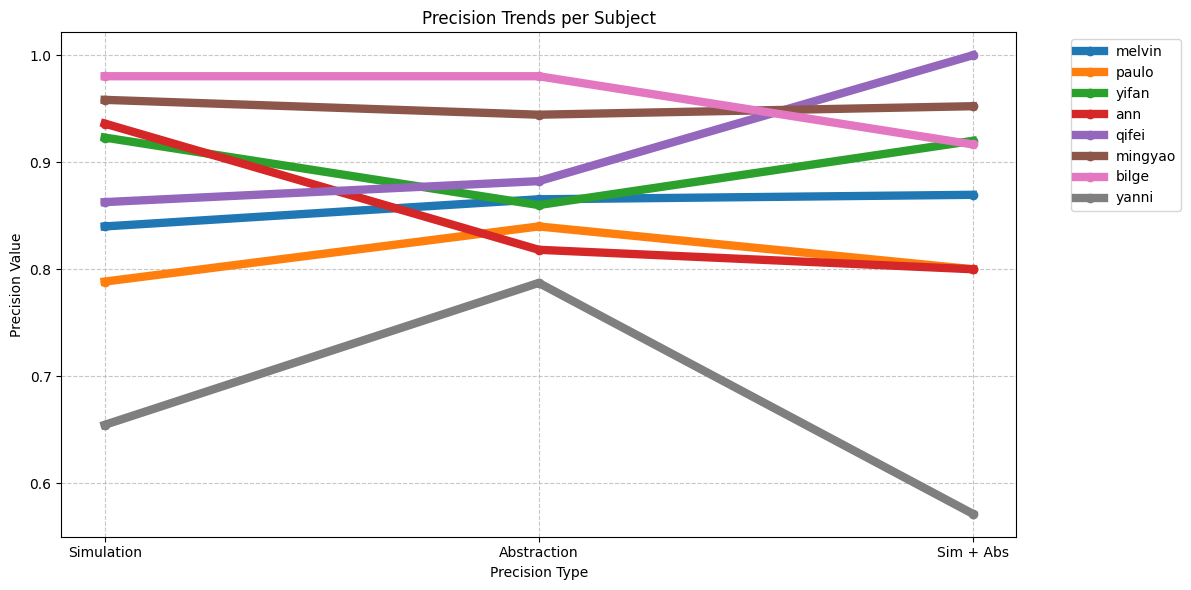

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data for all subjects
subjects = []
sim_precs = []
abs_precs = []
both_precs = []

for sub_idx, sub_df in enumerate(all_sub_dfs):
    prec_dubs = get_accuracy(sub_df, hypothesis="both", include_dubtrials="only", return_df=False)
    prec_separate = get_accuracy(sub_df, hypothesis="both", include_dubtrials=False, return_df=False)

    sim_prec = prec_separate["simulation"]
    abs_prec = prec_separate["abstraction"]
    both_prec = prec_dubs["sim + abs"]
    
    subjects.append(f"Subject {sub_idx + 1}")
    sim_precs.append(sim_prec)
    abs_precs.append(abs_prec)
    both_precs.append(both_prec)

# Create the plot
plt.figure(figsize=(12, 6))

x = np.arange(3)
width = 0.25

for i, (sim, abs, both) in enumerate(zip(sim_precs, abs_precs, both_precs)):
    plt.plot(x, [sim, abs, both], marker='o', label=f'{all_sub_names[i]}', linewidth=6)

plt.xlabel('Precision Type')
plt.ylabel('Precision Value')
plt.title('Precision Trends per Subject')
plt.xticks(x, ['Simulation', 'Abstraction', 'Sim + Abs'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


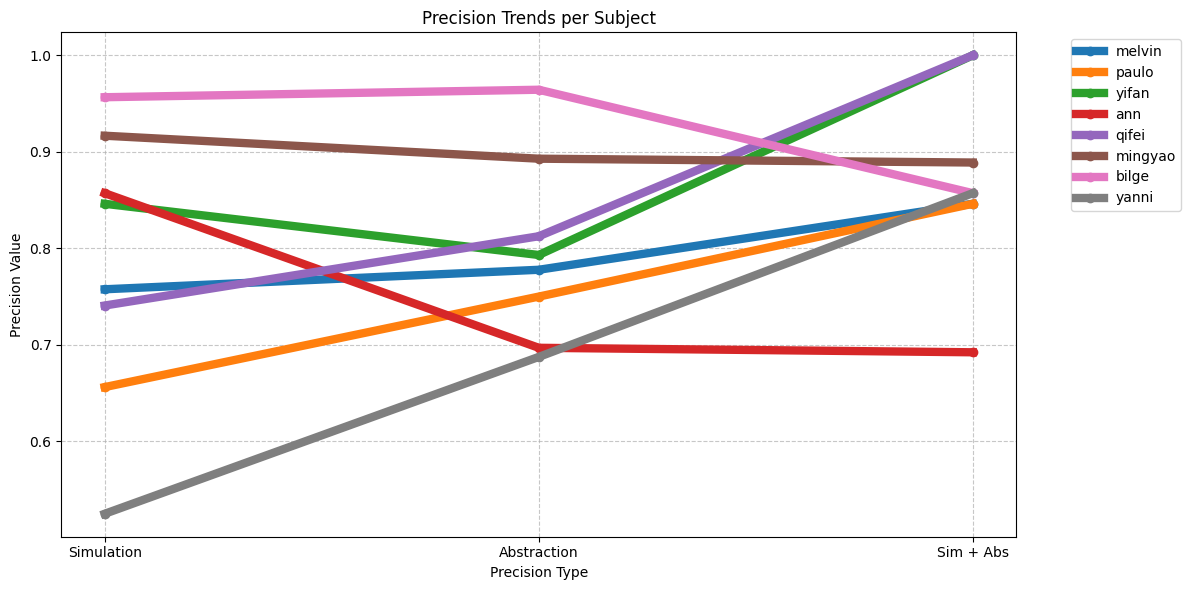

In [166]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data for all subjects
subjects = []
sim_precs = []
abs_precs = []
both_precs = []

for sub_idx, sub_df in enumerate(all_sub_dfs):
    prec_dubs = get_precision(sub_df, hypothesis="both", include_dubtrials="only", return_df=False)
    prec_separate = get_precision(sub_df, hypothesis="both", include_dubtrials=False, return_df=False)

    sim_prec = prec_separate["simulation"]
    abs_prec = prec_separate["abstraction"]
    both_prec = prec_dubs["sim + abs"]
    
    subjects.append(f"Subject {sub_idx + 1}")
    sim_precs.append(sim_prec)
    abs_precs.append(abs_prec)
    both_precs.append(both_prec)

# Create the plot
plt.figure(figsize=(12, 6))

x = np.arange(3)
width = 0.25

for i, (sim, abs, both) in enumerate(zip(sim_precs, abs_precs, both_precs)):
    plt.plot(x, [sim, abs, both], marker='o', label=f'{all_sub_names[i]}', linewidth=6)

plt.xlabel('Precision Type')
plt.ylabel('Precision Value')
plt.title('Precision Trends per Subject')
plt.xticks(x, ['Simulation', 'Abstraction', 'Sim + Abs'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


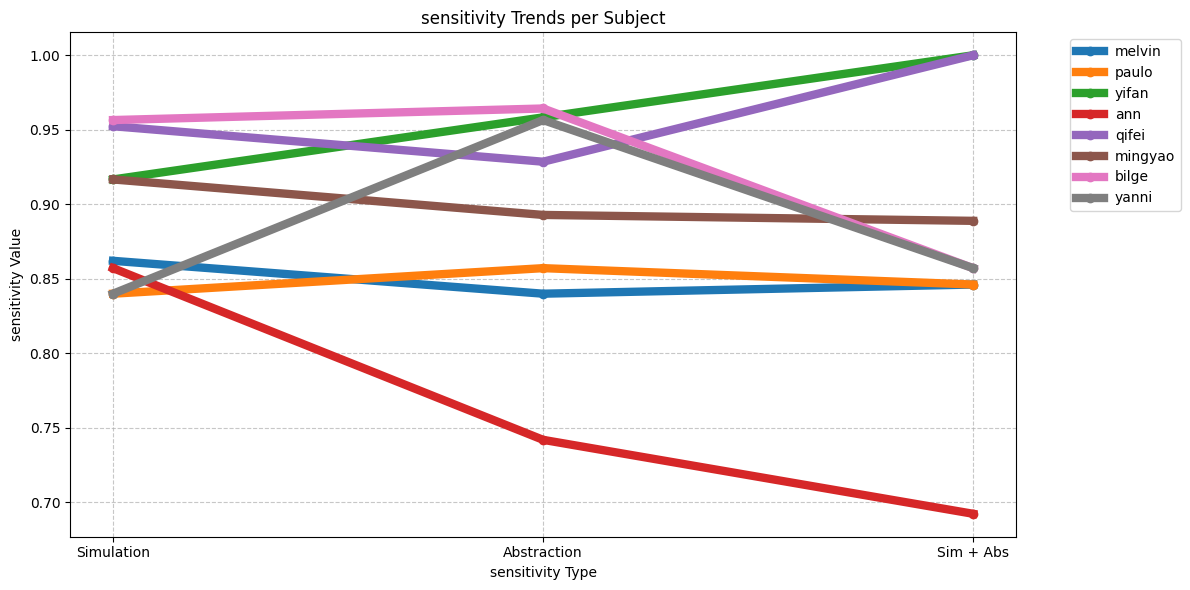

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data for all subjects
subjects = []
sim_precs = []
abs_precs = []
both_precs = []

for sub_idx, sub_df in enumerate(all_sub_dfs):
    prec_dubs = get_sensitivity(sub_df, hypothesis="both", include_dubtrials="only", return_df=False)
    prec_separate = get_sensitivity(sub_df, hypothesis="both", include_dubtrials=False, return_df=False)

    sim_prec = prec_separate["simulation"]
    abs_prec = prec_separate["abstraction"]
    both_prec = prec_dubs["sim + abs"]
    
    subjects.append(f"Subject {sub_idx + 1}")
    sim_precs.append(sim_prec)
    abs_precs.append(abs_prec)
    both_precs.append(both_prec)

# Create the plot
plt.figure(figsize=(12, 6))

x = np.arange(3)
width = 0.25

for i, (sim, abs, both) in enumerate(zip(sim_precs, abs_precs, both_precs)):
    plt.plot(x, [sim, abs, both], marker='o', label=f'{all_sub_names[i]}', linewidth=6)

plt.xlabel('sensitivity Type')
plt.ylabel('sensitivity Value')
plt.title('sensitivity Trends per Subject')
plt.xticks(x, ['Simulation', 'Abstraction', 'Sim + Abs'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


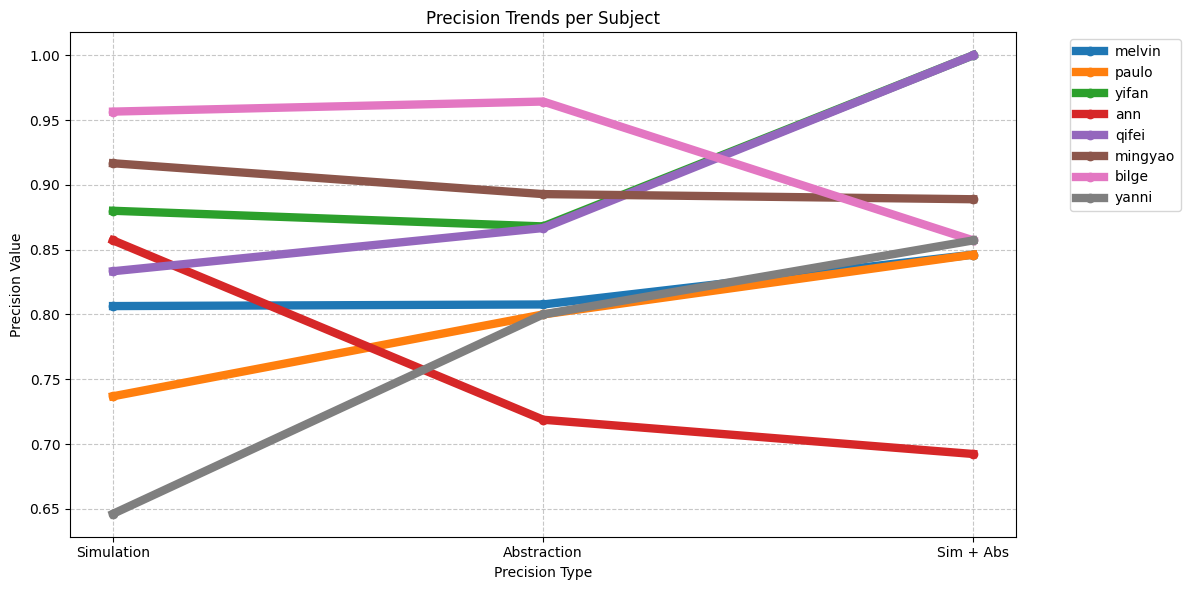

In [165]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data for all subjects
subjects = []
sim_f1s = []
abs_f1s = []
both_f1s = []

for sub_idx, sub_df in enumerate(all_sub_dfs):
    prec_dubs = get_precision(sub_df, hypothesis="both", include_dubtrials="only", return_df=False)
    prec_separate = get_precision(sub_df, hypothesis="both", include_dubtrials=False, return_df=False)

    sens_dubs = get_sensitivity(sub_df, hypothesis="both", include_dubtrials="only", return_df=False)
    sens_separate = get_sensitivity(sub_df, hypothesis="both", include_dubtrials=False, return_df=False)

    f1_dubs = get_f1_score(sub_df, hypothesis="both", include_dubtrials="only", return_df=False)
    f1_separate = get_f1_score(sub_df, hypothesis="both", include_dubtrials=False, return_df=False)

    sim_f1 = f1_separate["simulation"]
    abs_f1 = f1_separate["abstraction"]
    both_f1 = f1_dubs["sim + abs"]
    
    subjects.append(f"Subject {sub_idx + 1}")
    sim_f1s.append(sim_f1)
    abs_f1s.append(abs_f1)
    both_f1s.append(both_f1)

# Create the plot
plt.figure(figsize=(12, 6))

x = np.arange(3)
width = 0.25

for i, (sim, abs, both) in enumerate(zip(sim_f1s, abs_f1s, both_f1s)):
    plt.plot(x, [sim, abs, both], marker='o', label=f'{all_sub_names[i]}', linewidth=6)

plt.xlabel('Precision Type')
plt.ylabel('Precision Value')
plt.title('Precision Trends per Subject')
plt.xticks(x, ['Simulation', 'Abstraction', 'Sim + Abs'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


In [142]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

# Create an empty list to store all data frames
all_data = []

# Define types and their colors
types = ['Simulation', 'Abstraction', 'Both']
type_colors = {
    'Simulation': 'rgba(31, 119, 180, 0.7)',  # Blue
    'Abstraction': 'rgba(255, 127, 14, 0.7)',  # Orange
    'Both': 'rgba(44, 160, 44, 0.7)'  # Green
}

# Store means for each subject and type for line connections
means_data = {sub_name: {} for sub_name in all_sub_names}
positions_data = {sub_name: {} for sub_name in all_sub_names}

# Loop through all subjects
for sub_idx, sub in enumerate(all_sub_dfs):
    # Get your data as before
    prec_dubs = get_precision(sub, hypothesis="both", include_dubtrials="only", return_df=False)
    prec_separate = get_rt(sub, hypothesis="both", include_dubtrials=False, return_df=False)
    # sim_rt = rt_separate["simulation"]["rt"]
    # abs_rt = rt_separate["abstraction"]["rt"]
    # both_rt = rt_dubs["sim + abs"]["rt"]
    sim_prec = prec_separate["simulation"]
    abs_prec = prec_separate["abstraction"]
    both_prec = prec_dubs["sim + abs"]
    
    
    # Create a DataFrame with a subject column
    sub_name = all_sub_names[sub_idx]
    
    # Calculate means and store them
    means_data[sub_name]['Simulation'] = sim_prec
    means_data[sub_name]['Abstraction'] = abs_prec
    means_data[sub_name]['Both'] = both_prec
    
    sim_df = pd.DataFrame({
        'Reaction Time': sim_prec,
        'Type': 'Simulation',
        'Subject': sub_name
    })
    
    abs_df = pd.DataFrame({
        'Reaction Time': abs_prec,
        'Type': 'Abstraction',
        'Subject': sub_name
    })
    
    both_df = pd.DataFrame({
        'Reaction Time': both_prec,
        'Type': 'Both',
        'Subject': sub_name
    })
    
    # Append all DataFrames to our list
    all_data.extend([sim_df, abs_df, both_df])

# Combine all the data into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Create the plot
fig = go.Figure()

# Add all violin plots grouped by Subject and colored by Type
for i, sub_name in enumerate(all_sub_names):
    for j, type_name in enumerate(types):
        subset = combined_data[(combined_data['Subject'] == sub_name) & (combined_data['Type'] == type_name)]
        
        # Calculate position with offset for each type within a subject group
        position = i + (j - 1) * 0.25
        
        # Store position for later line plotting
        positions_data[sub_name][type_name] = position
        
        fig.add_trace(go.Violin(
            x=[position] * len(subset),  # Position on x-axis
            y=subset['Reaction Time'],
            name=f"{type_name}",
            legendgroup=type_name,  # Group legend entries by type
            showlegend=i == 0,      # Only show in legend once per type
            box_visible=True,
            meanline_visible=True,
            points='all',
            jitter=0.1,
            pointpos=0,
            line_color=type_colors[type_name],
            side='positive',
            width=0.4,
            spanmode='soft'
        ))

# Add connecting lines between means for each subject
for sub_name in all_sub_names:
    # Create x and y coordinates for the line
    x_values = [positions_data[sub_name][type_name] for type_name in types]
    y_values = [means_data[sub_name][type_name] for type_name in types]
    
    # Add the connecting line
    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        mode='lines',
        line=dict(color='rgba(0, 0, 0, 0.5)', width=8, dash='solid'),  # Gray dashed line
        showlegend=False,  # Don't show in legend
        hoverinfo='none'   # Disable hover info for the lines
    ))
    
    # Add markers at each mean point
    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        mode='markers',
        marker=dict(
            color=['rgba(31, 119, 180, 1)', 'rgba(255, 127, 14, 1)', 'rgba(44, 160, 44, 1)'],  # Match type colors
            size=8
        ),
        showlegend=False,
        hoverinfo='y',
        hovertemplate='Mean: %{y:.3f}s<extra></extra>'
    ))

# Update layout
fig.update_layout(
    title="Reaction Times by Subject with Connected Means",
    yaxis_title="Reaction Time (s)",
    violinmode='overlay',
    height=900,
    width=1600,
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(len(all_sub_names))),
        ticktext=all_sub_names,
        title="Subject"
    ),
    legend_title="Response Type",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)

fig.show()

ValueError: If using all scalar values, you must pass an index

In [115]:
from functions.physics import predict_ball_path

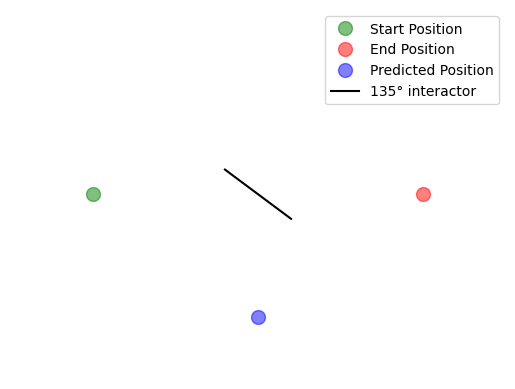

In [355]:
oei = predict_ball_path(hypothesis="sim", interactor="135", start_pos="left", end_pos="right", plot=True)


In [28]:
import pandas as pd
datadir = "/Users/wiegerscheurer/repos/physicspred/data"


subs = [sub for sub in os.listdir(datadir) if sub.startswith("sub")]
    

file_stack = []
for sub in subs:

    datafiles = os.listdir(f"{datadir}/{sub}/ball_hue/")
    for file in datafiles:
        
    
        if file.endswith(".csv"):
            this_file = pd.read_csv(f"{datadir}/{sub}/ball_hue/{file}")
            file_stack.append(this_file)

    # Concatenate all DataFrames in the list into a single DataFrame
    combined_df = pd.concat(file_stack, ignore_index=True)

    # Now combined_df contains all the data from the CSV files
    # print(combined_df)
combined_df

,trial,ball_speed,interactor,bounce,bounce_moment,random_bounce_direction,target_onset,speed_change,ball_change,abs_congruent,...,end_pos,abs_rfup,abs_rfright,abs_rfdown,abs_rfleft,sim_rfup,sim_rfright,sim_rfdown,sim_rfleft,Unnamed: 0
0,1,8.0,none_u,True,NaN,right,3.799316,faster,True,False,...,right,"(1, 0)","(0, 1)","(0, 0)","(0, 0)","(1, 0)","(0, 1)","(0, 0)","(0, 0)",NaN
1,2,8.0,45_top_u,True,3.602707,NaN,NaN,NaN,False,False,...,left,"(1, 0)","(0, 0)","(0, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)",NaN
2,3,7.5,135_bottom_r,False,NaN,NaN,NaN,NaN,False,True,...,right,"(0, 0)","(1, 1)","(0, 0)","(0, 0)","(1, 0)","(0, 1)","(0, 0)","(0, 0)",NaN
3,4,8.5,none_r,False,NaN,NaN,3.706895,faster,True,True,...,right,"(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)","(0, 0)",NaN
4,5,8.0,none_l,False,NaN,NaN,NaN,NaN,False,True,...,left,"(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,146,7.5,none_l,False,NaN,NaN,3.738320,slower,True,True,...,left,"(0, 0)","(0, 0)","(0, 0)","(1, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)",NaN
1196,147,8.0,135_bottom_d,True,3.631562,NaN,3.740338,faster,True,False,...,left,"(0, 0)","(0, 0)","(1, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)",NaN
1197,148,7.5,135_top_u,False,NaN,NaN,NaN,NaN,False,True,...,up,"(1, 1)","(0, 0)","(0, 0)","(0, 0)","(0, 1)","(1, 0)","(0, 0)","(0, 0)",NaN
1198,149,8.0,135_bottom_d,True,3.622973,NaN,3.728671,faster,True,False,...,left,"(0, 0)","(0, 0)","(1, 0)","(0, 1)","(0, 0)","(0, 0)","(0, 0)","(1, 1)",NaN


1            NaN
3       1.285118
4            NaN
5       1.291904
6       1.189316
          ...   
1192    0.635289
1194    0.636269
1195    0.640087
1196    0.671083
1198    0.613872
Name: rt, Length: 596, dtype: float64

### Main question: Do you include the targets that align with predictions from both hypotheses when computing the true positives?

In [80]:
import pyautogui

screen_width, screen_height = pyautogui.size()

print(f"Screen width: {screen_width}")
print(f"Screen height: {screen_height}")

Screen width: 1800
Screen height: 1169


### On what basis to filter?
### Accuracy for targets, but also number of false positives (respond when no change)
### Both are indicative of how well someone has simulated
### But not sure if you should include them in both, or combine them, in what way
### I guess you could just add the trials where you've responded wrongly to the missed targets for a category
### But this I should discuss with micha and floris
### Because in a sense every non-response when there's no target is also a good percept
### So first just look at the target present trials

In [42]:
import numpy as np

# Assuming combined_df is your DataFrame
# Filter rows where ball_change is True and sim_congruent is True
hypotheses = ["simulation", "abstraction"]
for hypothesis in hypotheses:
    other_hypothesis = [h for h in hypotheses if h != hypothesis][0]
    filtered_df = combined_df[
        (combined_df['ball_change'] == True) & 
        (combined_df[hypothesis[:3] + '_congruent'] == True) & 
        (~combined_df[other_hypothesis[:3] + '_congruent'])
    ]

    # Select the accuracy column from the filtered DataFrame
    accuracy_values = filtered_df['accuracy']

    # print(accuracy_values)

    print(f"{hypothesis}={np.mean(accuracy_values)}")

simulation=0.7692307692307693
abstraction=0.8333333333333334


In [11]:
count_list_types(trials)

{'none': 33, '135': 33, '45': 34}

In [264]:
oei = {"sok": (0,1)}
np.array(oei["sok"])

kont = (0, 1)

np.array((kont[1], kont[0]))

array([1, 0])

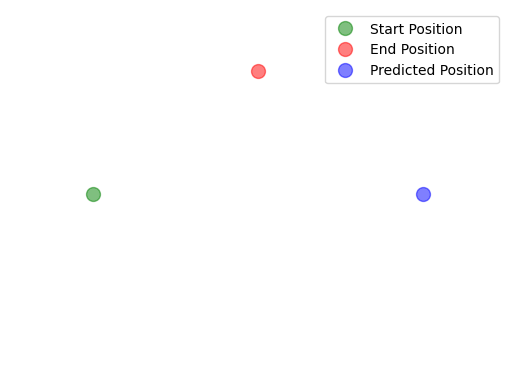

In [256]:
oei = predict_ball_path(hypothesis="abs", interactor="none", start_pos="left", end_pos="top", plot=True)


In [254]:
kont = (1, 1)
print(sum(kont))



2


In [245]:
exp_data = {
    "abs_rftop": [],
    "abs_rfright": [],
    "abs_rfdown": [],
    "abs_rfleft": [],
    "sim_rftop": [],
    "sim_rfright": [],
    "sim_rfdown": [],
    "sim_rfleft": []
}

# exp_data["abs_rftop"].append(None)  # Placeholder for absolute RF top
# exp_data["abs_rfright"].append(None)  # Placeholder for absolute RF right
# exp_data["abs_rfdown"].append(None)  # Placeholder for absolute RF down
# exp_data["abs_rfleft"].append(None)  # Placeholder for absolute RF left
# exp_data["sim_rftop"].append(None)  # Placeholder for simulated RF top
# exp_data["sim_rfright"].append(None)  # Placeholder for simulated RF right
# exp_data["sim_rfdown"].append(None)  # Placeholder for simulated RF down
# exp_data["sim_rfleft"].append(None)  # Placeholder for simulated RF left

In [252]:
for hypothesis in ["abs", "sim"]:
    pred_to_input = predict_ball_path(hypothesis=hypothesis, interactor="45", start_pos="top", end_pos="left")
    for location in pred_to_input.keys():
        exp_data[f"{hypothesis}_rf{location}"] = pred_to_input[location]
        

In [253]:
exp_data

{'abs_rftop': (0, 0),
 'abs_rfright': (0, 0),
 'abs_rfdown': (1, 0),
 'abs_rfleft': (0, 1),
 'sim_rftop': (0, 0),
 'sim_rfright': (0, 0),
 'sim_rfdown': (0, 0),
 'sim_rfleft': (1, 1)}

In [191]:
predict_ball_path(hypothesis="sim", interactor="45", start_pos="top", end_pos="left")
# IMPORTANT DIFFERENCE HERE IS THAT THE ARGUMENT IS THE START LOCATION, NOT DIRECTION (CONFUSING)

top
right
down
left


{'top': [0, 0], 'right': [0, 0], 'down': [0, 0], 'left': [1, 1]}

### MAKE SURE TO FILTER OUT THE RF RESPONSES TO SENSORY INPUT PRIOR TO BALL REACHING OCCLUDER!!!!! 

### Difficult thing is to decide what the prediction is about, because the start direction and position is different than the 3 outcome directions. What to include in analyses?

In [101]:
preds = {"top": [0],
         "right": [0],
         "down": [0],
         "left": [0]}

In [104]:
for key in preds.keys():
    preds[key].append(1)

In [105]:
preds

{'top': [0, 1], 'right': [0, 1], 'down': [0, 1], 'left': [0, 1]}

In [99]:
preds["top"].append(1)

In [100]:
preds

{'top': [0, 1], 'right': [0], 'down': [0], 'left': [0]}

In [74]:
_rotate_90("top", "left")

(0, 1)

In [95]:
_vec_to_dir((-1,0))
_vec_to_dir(_rotate_90("top", "left"))

'left'

In [96]:
_bounce_ball("down", "45")

'left'

In [87]:
_startpos_to_dir("down")

'top'

In [37]:
import numpy as np



# Example usage
top_direction = (1, 0)
right_direction = rotate_90(start_direction=down_direction, left_or_right="left")

# print(f"Down direction: {down_direction}")
# print(f"Right direction after 90 degree rotation: {right_direction}")
print(right_direction)

(0, 1)


In [38]:
# derivatives, or row and column changes (y, x)
top_direction = (1, 0)
right_direction = (0, 1)
down_direction = (-1, 0)
left_direction = (0, -1)

# This should be possible with computation
path_conversion = {
    "start_pos": ["top", "right", "down", "left"],
    "45": ["left", "down", "right", "top"], 
    "135": ["right", "top", "left", "down"],
}

In [43]:
import pandas as pd
path_df = pd.DataFrame(path_conversion)

In [76]:
np.zeros((1,4))

array([[0., 0., 0., 0.]])

KeyError: 'top'